In [6]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set(style="darkgrid")
from time import time

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
# Import the three supervised learning models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA    

# Pretty display for notebooks
%matplotlib inline
from random import shuffle

In [3]:
conda install -c anaconda scikit-learn

Solving environment: done

## Package Plan ##

  environment location: /home/manjish/anaconda3

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.10.14 |                0         128 KB  anaconda
    openssl-1.1.1h             |       h7b6447c_0         3.8 MB  anaconda
    scikit-learn-0.23.2        |   py38h0573a6f_0         7.0 MB  anaconda
    ------------------------------------------------------------
                                           Total:        11.0 MB

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates                                 pkgs/main --> anaconda
  openssl                                         pkgs/main --> anaconda
  scikit-learn                                    pkgs/main --> anaconda



ca-certificates-2020 | 128 KB    | ############################

In [2]:
# import numpy as np
# k=[*range(0,10)]
# print(k)
# print(np.random.shuffle(k))

# p=[]
# for i in range(3):
#     p.append(0)
# p[0]=0
# p[1]=1
# p[2]=2
# print(p)

# # for i in range(10):
# #     a = 'l_'
# #     b = str(i)
# #     c = a+b
    
# #     print(c)
# #     c= [p]
    
# #     print(c)
# c=np.zeros(10,dtype=int)    
# for i in range(10):
# #     a = 'l_'
# #     b = str(i)
# #     c = a+b
    
# #     print(c)
#     c[i]= i
    
# print(c[0:9])        
# k=c[0:9]
# print(k)
   

In [3]:
# p=np.arange(0,10)
# np.random.shuffle(p)
# print(p)
# p=np.arange(0,10,1)
# np.random.shuffle(p)
# print(p)

# dict = {0: [1, 2,3]}
# for k,v in dict.items():
#     print(k,v)   
    
# dict1={}    
# p=[0 ,2,1]    
# for k in dict.keys():
#     dict1[k]=np.array(dict[k])[p]
# print(dict)    

In [3]:
#NG
'''
import time
import pulp as p 
def min_max_lp_all_ng4(data1,beta,eps,e):
    import pulp as p 
    import math
    
    m=data1.shape[0]
    n=data1.shape[1]
    print('dimension of data')
    print(m,n)
    
    ################ sorted result
    
    
    ################
    Lp_prob = p.LpProblem('Problem', p.LpMinimize)  
   
    
#     X=np.zeros(n+1,dtype=p.LpVariable)
    X=np.zeros(n+m+1,dtype=p.LpVariable)
    sizes=np.zeros(m,dtype=int)
#     report_index(index,data1,e):  
    max_size=0
    for i in range(m):
        count=0
        for j in range(n):
            if data1[i][j]==1:
                count=count+1 
        if count>max_size:
            max_size=count
        sizes[i]=count
  
    select_sizes=np.zeros(m,dtype=int)
   
    size_final=np.zeros(m,dtype=int)

    
    for i in range(n):
        var1=str(i)       
        X[i]=p.LpVariable(var1,lowBound=0,upBound=1,cat='Integer')
   
    X[n]=p.LpVariable(str(n),lowBound=0,upBound=1,cat='Continuous')  
#     for i in range(m):
#         k=n+i+1
#         var1=str(k)     
#         alpha=(((sizes[i])*(sizes[i]+1))/2)
#         X[i]=p.LpVariable(var1,lowBound=(((beta*sizes[i])*(beta*sizes[i]+1))/2),upBound=alpha,cat='Continuous')
    
        
#     X[n]=  p.LpVariable("z1",lowBound=0)
    #X[n+1]=  p.LpVariable("z2",lowBound=0)
  

    #########objective function#####################
    
#     Lp_prob += 2*X[n+1]+10*X[n+2]+9*X[n+3]+3*X[n+4]
    Lp_prob+= p.lpSum([p.lpSum([(X[j])*(data1[i][j])*(sizes[i]-report_index(j,i,data1,e)+1) for j in range(n)]) for i in range(m)])
  
    

    ##############constraint#################
    for i in range(2*m):
        if i<m:

            Lp_prob += p.lpSum([(X[j])*(data1[i][j]) for j in range(n)]) >= beta*sizes[i]
            Lp_prob += p.lpSum([(X[j])*(data1[i][j]) for j in range(n)]) <= (beta+eps)*sizes[i]
           # Lp_prob += p.lpSum([(X[j])*(data1[i][j])*(sizes[i]-report_index(j,i,data1,e)+1) for j in range(n)]) <= X[n+i+1]

#              Lp_prob += p.lpSum([(X[j])*(data1[i][j])*(sizes[i]-report_index(j,i,data1,e)+1)/1000 for j in range(n)]) >= X[n+i+1]
    
            
#         else:        
#             Lp_prob += X[n] >= p.lpSum([-1*2*(X[j]-0.5)*data1[i-m][j] for j in range(n)])   /((sizes[i])*(sizes[i]+1)/2)
            #Lp_prob += X[n+1] >= p.lpSum([-1*2*(X[j]-0.5)+r[j] for j in range(n)]) 
#     Lp_prob += X[n+1] >= p.lpSum([2*(X[j]-0.5)-r[j] for j in range(n)])
#     Lp_prob += X[n+1] >= p.lpSum([-1*2*(X[j]-0.5)+r[j] for j in range(n)])       
         
#     Lp_prob += p.lpSum([2*(X[i]-0.5)*r[i] for i in range(n)]) >= X[n]*n
    
#     Lp_prob += p.lpSum([2*(X[i]-0.5)*r[i]*(1/pow(2,l1.index(i))) for i in l1]) >= 2*(1-(1/pow(2,math.floor(beta*size_final[0]))))
#     Lp_prob += p.lpSum([2*(X[i]-0.5)*r[i]*(1/pow(2,l2.index(i))) for i in l2]) >= 2*(1-(1/pow(2,math.floor(beta*size_final[1]))))
#     Lp_prob += p.lpSum([2*(X[i]-0.5)*r[i]*(1/pow(2,l3.index(i))) for i in l3]) >= 2*(1-(1/pow(2,math.floor(beta*size_final[2]))))
#     Lp_prob += p.lpSum([2*(X[i]-0.5)*r[i]*(1/pow(2,l4.index(i))) for i in l4]) >= 2*(1-(1/pow(2,math.floor(beta*size_final[3]))))
    
    #n is the number of elements in sensitive attribute 
                 
#     Lp_prob += X[n] <= 42000
        
    #####################################
    status = Lp_prob.solve()   # Solver 
    print(p.LpStatus[status]) 
    print("objective is:")        
    print(p.value(Lp_prob.objective))
    print("discripency is:") 
    print(p.value(X[n]))
    x=np.zeros(n,dtype=float)

   # The solution status 
    Synth1={}
    Synth2={}
    # # Printing the final solution 
    for i in range(n):
        if(p.value(X[i])==1):
            Synth1[i]=1 
            Synth2[i]=-1
#             if(data1[2][i]==1):
#                 print("no")
        else:
            Synth1[i]=-1
            Synth2[i]=1
    Synthu1=Synth1  
    Synthu2=Synth2  
    
              
    return Synthu1,Synthu2
'''    


'\nimport time\nimport pulp as p \ndef min_max_lp_all_ng4(data1,beta,eps,e):\n    import pulp as p \n    import math\n    \n    m=data1.shape[0]\n    n=data1.shape[1]\n    print(\'dimension of data\')\n    print(m,n)\n    \n    ################ sorted result\n    \n    \n    ################\n    Lp_prob = p.LpProblem(\'Problem\', p.LpMinimize)  \n   \n    \n#     X=np.zeros(n+1,dtype=p.LpVariable)\n    X=np.zeros(n+m+1,dtype=p.LpVariable)\n    sizes=np.zeros(m,dtype=int)\n#     report_index(index,data1,e):  \n    max_size=0\n    for i in range(m):\n        count=0\n        for j in range(n):\n            if data1[i][j]==1:\n                count=count+1 \n        if count>max_size:\n            max_size=count\n        sizes[i]=count\n  \n    select_sizes=np.zeros(m,dtype=int)\n   \n    size_final=np.zeros(m,dtype=int)\n\n    \n    for i in range(n):\n        var1=str(i)       \n        X[i]=p.LpVariable(var1,lowBound=0,upBound=1,cat=\'Integer\')\n   \n    X[n]=p.LpVariable(str(n),lowB

In [3]:
# #without accuracy ---> 1
# def main(datax,rx):
     
    
#     n=datax.shape[1]
#     s=datax.shape[0]
        
#     r = np.zeros(n, dtype = int) 
#     data = np.zeros((s, n), dtype = int)
#     for i in range(n):
#         if int(rx.iloc[i,0])==1 :
#             r[i]=1
#         else :
#             r[i]= 0   
#     ar=[]
    
    
#     for j in range(s):
#         print("sensitive attribute ",(j+1)) 
#         a=0
#         b=0
#         acc1=0
#         acc2=0
#         for i in range(n):
                
#                 data[j][i]= datax.iloc[j,i]
#                 if data[j][i]== 1 :
#                     a=a+1
#                     if r[i]==1:
#                          acc1=acc1+1 

#         print("total ,fair accepted, aceeptance rate:")             
#         a1=float(acc1/a)

#         print(a)
#         print(acc1)
#         print(a1)
#         ar.append(a1)
        
#     maxi=max(ar)
#     mini= min(ar)
#     DP=float(maxi-mini)
#     print("data acceptance rates")
#     print(ar)
#     print("data DP")
#     print(DP)                       
                    
#     gama=[.1,.15,.2,.25,.3,.4,.5]
#     epsilon=[.0001,.0002,.0003,.0004,.0008,.0009,.001]
    
#     for gamma in gama:
#         for eps in epsilon:
#             u1,u2=min_max_lp_all(data,gamma,eps,r)
#             #######################Disp_impact#######################  
#             print("gamma-epsilon",gamma,eps)
#             ar=[]
#             for j in range(s):
#                 print("sensitive attribute ",(j+1)) 
#                 a=0
#                 b=0
#                 acc1=0
#                 acc2=0
#                 for i in range(n):
#                         if data[j][i]== 1 :
#                             a=a+1
#                             if u1[i]==1:
#                                  acc1=acc1+1 

#                 print("total ,fair accepted, aceeptance rate:")             
#                 a1=float(acc1/a)
                
#                 print(a)
#                 print(acc1)
#                 print(a1)
#                 ar.append(a1)
             
#             maxi=max(ar)
#             mini= min(ar)
#             DP=float(maxi-mini)
#             print("acceptance rates")
#             print(ar)
#             print("DP")
#             print(DP)

#     return 0

In [4]:
# ##  (without accuracy)  ## ---> 1
# # import time
# # import pulp as p 
# def min_max_lp_all(data1,gamma,eps,r):
#     import time
#     import pulp as p 
#     m=data1.shape[0]
#     n=data1.shape[1]
#     print('dimension of data')
#     print(m,n)
#     Lp_prob = p.LpProblem('Problem', p.LpMinimize)  
   
    
#     X=np.zeros(n+1,dtype=p.LpVariable)
#     sizes=np.zeros(m,dtype=int)
#     for i in range(m):
#         count=0
#         for j in range(n):
#             if data1[i][j]==1:
#                 count=count+1
                
#         sizes[i]=count
  

#     for i in range(n):
#         var1=str(i)
        
#         X[i]=p.LpVariable(var1,lowBound=0,upBound=1,cat='Integer')
       
        
# #     X[n] =  p.LpVariable("z1",lowBound=0)


#     #########objective function#####################
# #     Lp_prob += X[n]
#       Lp_prob+=1

#     ##############constraint#################
#     for i in range(2*m):
#         if i<m:
# #             Lp_prob += X[n] >= p.lpSum([2*(X[j]-0.5)*data1[i][j] for j in range(n)])
#             Lp_prob += p.lpSum([2*(X[j]-0.5)*data1[i][j] for j in range(n)]) >= (2*gamma-1)*sizes[i]
#             Lp_prob += p.lpSum([2*(X[j]-0.5)*data1[i][j] for j in range(n)]) <= ((2*gamma-1)+eps)*sizes[i]
            
# #         else:        
# #             Lp_prob += X[n] >= p.lpSum([-1*2*(X[j]-0.5)*data1[i-m][j] for j in range(n)])
            
        
#     #n is the number of elements in sensitive attribute 
         
# #     Lp_prob += X[n] <= 42000
    
#     #####################################
#     status = Lp_prob.solve()   # Solver 
#     print(p.LpStatus[status]) 
#     print("discripency is:")        
#     print(p.value(Lp_prob.objective))
#     x=np.zeros(n,dtype=float)

#    # The solution status 
#     Synth1={}
#     Synth2={}
#     # # Printing the final solution 
#     for i in range(n):
#         if(p.value(X[i])==1):
#             Synth1[i]=1 
#             Synth2[i]=-1
#         else:
#             Synth1[i]=-1
#             Synth2[i]=1
#     Synthu1=Synth1  
#     Synthu2=Synth2  
    
              
#     return Synthu1,Synthu2   


In [5]:
# # without accuracy
# import time
# import pulp as p 
# data= pd.read_csv('data/bank_train.csv',skipinitialspace=True)

# # print(data.head())
# # print(data.shape[0],data.shape[1])

# #sensitive columns name 0='age',2='marital'

# # print(sens)
# r=data[['y']]

# sens=data[['age','marital']]
# print(sens)
# p=sens.shape[0]

# # for i in range(0,p):  
# #     
            
# for i in range(0,p):
#     if sens.loc[i,'age'] > 60 or sens.loc[i,'age'] < 25 :
#                sens.loc[i,'age'] = 1 
#     else :
#                sens.loc[i,'age'] = 2  
#     if r.loc[i,'y'] == 1 :
#                r.loc[i,"y"] = 1 
#     else: 
#                r.loc[i,"y"] = 0 
            
# sens1 = pd.get_dummies(sens, columns=['age','marital'], prefix =['a','m'])
# sensitive = sens1.T
# print(sensitive)

# # (unique, counts) = numpy.unique(Y_test_pred, return_counts=True)
# # frequencies = numpy.asarray((unique, counts)).T
# # print(frequencies)
# # print(r['y'].value_counts())




# x=main(sensitive, r)




In [7]:
#SVM 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%pylab inline
from random import *
from subprocess import check_output
def adult_svm(X,Y):
    #Split data into training and test datasets (training will be based on 70% of data)
    from sklearn.model_selection import train_test_split
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0,shuffle=True) 
    #test_size: if integer, number of examples into test dataset; if between 0.0 and 1.0, means proportion
    print('There are {} samples in the training set and {} samples in the test set'.format(X_train.shape[0], X_test.shape[0]))

    
    #Scaling dataL
    #from sklearn.preprocessing import StandardScaler
    
    from sklearn.model_selection import cross_val_score

    #sc = StandardScaler(with_mean=False)
    
    
    #sc.fit(X_train)
    #X_train_std = sc.transform(X_train)
    #X_test_std = sc.transform(X_test)

    #X_train_std and X_test_std are the scaled datasets to be used in algorithms

    #Applying SVC (Support Vector Classification)
    from sklearn.svm import SVC
    svm = SVC(kernel='rbf', random_state=0, gamma=.1, C=10.0,probability=True)
    
    print(Y_train.dtypes)
    Y_train=Y_train.astype('int')
    print(Y_train.dtypes)
    
    print(Y_test.dtypes)
    Y_test=Y_test.astype('int')
    print(Y_test.dtypes)
    
    
    svm.fit(X_train, Y_train)
    print('The accuracy of the SVM classifier on training data is {:.2f}'.format(svm.score(X_train, Y_train)))
    print('The accuracy of the SVM classifier on test data is {:.2f}'.format(svm.score(X_test, Y_test)))
    print('####Train prediction Label###############################################')
    Y_train_pred=svm.predict(X_train)
    #print(y_1)
    Y_test_pred=svm.predict(X_test)

    print('####Actual Train Label###############################################')


    print('####Change to colors###############################################')
        
    e=svm.predict_proba(X_test)
    print(e)
    return X_test,Y_test_pred,Y_test,e
     



Populating the interactive namespace from numpy and matplotlib


/home/manjish/.local/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['seed', 'triangular', 'random', 'shuffle', 'randint', 'sample', 'time', 'choice', 'uniform']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [2]:
# # without accuracy ---> 2
# import time
# import pulp as p 
# def min_max_lp_all2(data1,gamma,eps,r,delta):
#     import pulp as p 
    
#     m=data1.shape[0]
#     n=data1.shape[1]
#     print('dimension of data')
#     print(m,n)
#     Lp_prob = p.LpProblem('Problem', p.LpMinimize)  
   
    
# #     X=np.zeros(n+1,dtype=p.LpVariable)
#     X=np.zeros(n,dtype=p.LpVariable)
#     sizes=np.zeros(m,dtype=int)
#     for i in range(m):
#         count=0
#         for j in range(n):
#             if data1[i][j]==1:
#                 count=count+1               
#         sizes[i]=count
  

#     for i in range(n):
#         var1=str(i)       
#         X[i]=p.LpVariable(var1,lowBound=0,upBound=1,cat='Integer')
       
        
# #     X[n]=  p.LpVariable("z1",lowBound=0)
#     #X[n+1]=  p.LpVariable("z2",lowBound=0)


#     #########objective function#####################
# #     Lp_prob += X[n] 
#     Lp_prob += 1 


#     ##############constraint#################
#     for i in range(2*m):
#         if i<m:
# #             Lp_prob += X[n] >= p.lpSum([2*(X[j]-0.5)*data1[i][j] for j in range(n)])
#             Lp_prob += p.lpSum([2*(X[j]-0.5)*data1[i][j] for j in range(n)]) >= (2*gamma-1)*sizes[i]
#             Lp_prob += p.lpSum([2*(X[j]-0.5)*data1[i][j] for j in range(n)]) <= ((2*gamma-1)+eps)*sizes[i]
            
# #         else:        
# #             Lp_prob += X[n] >= p.lpSum([-1*2*(X[j]-0.5)*data1[i-m][j] for j in range(n)])
#             #Lp_prob += X[n+1] >= p.lpSum([-1*2*(X[j]-0.5)+r[j] for j in range(n)]) 
# #     Lp_prob += X[n+1] >= p.lpSum([2*(X[j]-0.5)-r[j] for j in range(n)])
# #     Lp_prob += X[n+1] >= p.lpSum([-1*2*(X[j]-0.5)+r[j] for j in range(n)])       
         
#     Lp_prob += p.lpSum([2*(X[i]-0.5)*r[i] for i in range(n)])>=delta*n
#     #n is the number of elements in sensitive attribute 
                 
# #     Lp_prob += X[n] <= 42000
    
#     #####################################
#     status = Lp_prob.solve()   # Solver 
#     print(p.LpStatus[status]) 
#     print("discripency is:")        
#     print(p.value(Lp_prob.objective))
#     x=np.zeros(n,dtype=float)

#    # The solution status 
#     Synth1={}
#     Synth2={}
#     # # Printing the final solution 
#     for i in range(n):
#         if(p.value(X[i])==1):
#             Synth1[i]=1 
#             Synth2[i]=-1
#         else:
#             Synth1[i]=-1
#             Synth2[i]=1
#     Synthu1=Synth1  
#     Synthu2=Synth2  
    
              
#     return Synthu1,Synthu2   
p=np.arange(1,.79,-.01)
print([p[1]])

[0.99]


In [3]:
# # NG
# import time
# import pulp as p 
# def min_max_lp_all_ng2(data1,gamma,eps,r,delta):
#     import pulp as p 
    
#     m=data1.shape[0]
#     n=data1.shape[1]
#     print('dimension of data')
#     print(m,n)
#     Lp_prob = p.LpProblem('Problem', p.LpMinimize)  
   
    
# #     X=np.zeros(n+1,dtype=p.LpVariable)
#     X=np.zeros(n+1,dtype=p.LpVariable)
#     sizes=np.zeros(m,dtype=int)
#     for i in range(m):
#         count=0
#         for j in range(n):
#             if data1[i][j]==1:
#                 count=count+1               
#         sizes[i]=count
  

#     for i in range(n):
#         var1=str(i)       
#         X[i]=p.LpVariable(var1,lowBound=0,upBound=1,cat='Integer')
    
#     X[n]=p.LpVariable(str(n),lowBound=0,upBound=1,cat='Continuous')   
        
# #     X[n]=  p.LpVariable("z1",lowBound=0)
#     #X[n+1]=  p.LpVariable("z2",lowBound=0)


#     #########objective function#####################
# #     Lp_prob += X[n] 
            
#     Lp_prob += X[n]


#     ##############constraint#################
#     for i in range(2*m):
#         if i<m:
# #             Lp_prob += X[n] >= p.lpSum([2*(X[j]-0.5)*data1[i][j] for j in range(n)])
#             Lp_prob += p.lpSum([2*(X[j]-0.5)*data1[i][j] for j in range(n)]) >= (2*gamma-1)*sizes[i]
#             Lp_prob += p.lpSum([2*(X[j]-0.5)*data1[i][j] for j in range(n)]) <= ((2*gamma-1)+eps)*sizes[i]
            
# #         else:        
# #             Lp_prob += X[n] >= p.lpSum([-1*2*(X[j]-0.5)*data1[i-m][j] for j in range(n)])
#             #Lp_prob += X[n+1] >= p.lpSum([-1*2*(X[j]-0.5)+r[j] for j in range(n)]) 
# #     Lp_prob += X[n+1] >= p.lpSum([2*(X[j]-0.5)-r[j] for j in range(n)])
# #     Lp_prob += X[n+1] >= p.lpSum([-1*2*(X[j]-0.5)+r[j] for j in range(n)])       
         
#     Lp_prob += p.lpSum([2*(X[i]-0.5)*r[i] for i in range(n)]) >= X[n]*n
#     #n is the number of elements in sensitive attribute 
                 
# #     Lp_prob += X[n] <= 42000
    
#     #####################################
#     status = Lp_prob.solve()   # Solver 
#     print(p.LpStatus[status]) 
#     print("discripency is:")        
#     print(p.value(Lp_prob.objective))
    
#     x=np.zeros(n,dtype=float)

#    # The solution status 
#     Synth1={}
#     Synth2={}
#     # # Printing the final solution 
#     for i in range(n):
#         if(p.value(X[i])==1):
#             Synth1[i]=1 
#             Synth2[i]=-1
#         else:
#             Synth1[i]=-1
#             Synth2[i]=1
#     Synthu1=Synth1  
#     Synthu2=Synth2  
    
              
#     return Synthu1,Synthu2   


In [4]:
# # NG
# import time
# import pulp as p 
# def min_max_lp_all_ng2(data1,gamma,eps,r,delta):
#     import pulp as p 
    
#     m=data1.shape[0]
#     n=data1.shape[1]
#     print('dimension of data')
#     print(m,n)
#     Lp_prob = p.LpProblem('Problem', p.LpMaximize)  
   
    
# #     X=np.zeros(n+1,dtype=p.LpVariable)
#     X=np.zeros(n+1,dtype=p.LpVariable)
#     sizes=np.zeros(m,dtype=int)
#     for i in range(m):
#         count=0
#         for j in range(n):
#             if data1[i][j]==1:
#                 count=count+1               
#         sizes[i]=count
  

#     for i in range(n):
#         var1=str(i)       
#         X[i]=p.LpVariable(var1,lowBound=0,upBound=1,cat='Integer')
    
#     X[n]=p.LpVariable(str(n),lowBound=0,upBound=1,cat='Continuous')   
        
# #     X[n]=  p.LpVariable("z1",lowBound=0)
#     #X[n+1]=  p.LpVariable("z2",lowBound=0)


#     #########objective function#####################
# #     Lp_prob += X[n] 
            
#     Lp_prob += X[n]


#     ##############constraint#################
#     for i in range(2*m):
#         if i<m:
# #             Lp_prob += X[n] >= p.lpSum([2*(X[j]-0.5)*data1[i][j] for j in range(n)])
#             Lp_prob += p.lpSum([2*(X[j]-0.5)*data1[i][j] for j in range(n)]) >= (2*gamma-1)*sizes[i]
#             Lp_prob += p.lpSum([2*(X[j]-0.5)*data1[i][j] for j in range(n)]) <= ((2*gamma-1)+eps)*sizes[i]
            
# #         else:        
# #             Lp_prob += X[n] >= p.lpSum([-1*2*(X[j]-0.5)*data1[i-m][j] for j in range(n)])
#             #Lp_prob += X[n+1] >= p.lpSum([-1*2*(X[j]-0.5)+r[j] for j in range(n)]) 
# #     Lp_prob += X[n+1] >= p.lpSum([2*(X[j]-0.5)-r[j] for j in range(n)])
# #     Lp_prob += X[n+1] >= p.lpSum([-1*2*(X[j]-0.5)+r[j] for j in range(n)])       
         
#     Lp_prob += p.lpSum([2*(X[i]-0.5)*r[i] for i in range(n)]) >= X[n]*n
#     #n is the number of elements in sensitive attribute 
                 
# #     Lp_prob += X[n] <= 42000
    
#     #####################################
#     status = Lp_prob.solve()   # Solver 
#     print(p.LpStatus[status]) 
#     print("discripency is:")        
#     print(p.value(Lp_prob.objective))
    
#     x=np.zeros(n,dtype=float)

#    # The solution status 
#     Synth1={}
#     Synth2={}
#     # # Printing the final solution 
#     for i in range(n):
#         if(p.value(X[i])==1):
#             Synth1[i]=1 
#             Synth2[i]=-1
#         else:
#             Synth1[i]=-1
#             Synth2[i]=1
#     Synthu1=Synth1  
#     Synthu2=Synth2  
    
              
#     return Synthu1,Synthu2   


In [8]:
# #without accuracy ---> 2
# def main(datax, y_test, y_test_pred): 
        
#     n=datax.shape[1]
#     s=datax.shape[0]    
#     data = np.zeros((s, n), dtype = int)
    
#     r = np.zeros(n, dtype = int) 
    
#     for i in range(n):
#         if int(y_test.iloc[i])==1 :
#             r[i]=1
#         else :
#             r[i]= -1  
    
#     r2 = np.zeros(n, dtype = int) 
#     for i in range(n):
#         if int(y_test_pred[i])==1 :
#             r2[i]=1
#         else :
#             r2[i]= -1          
#     ar=[]
    
#     for j in range(s):
#         print("sensitive attribute ",(j+1)) 
#         a=0
#         b=0
#         acc1=0
#         acc2=0
#         for i in range(n):
#                 data[j][i]= datax.iloc[j,i]
#                 if data[j][i]== 1 :
#                     a=a+1
#                     if r[i]==1:
#                          acc1=acc1+1 

#         print("total ,fair accepted, aceeptance rate:")             
#         a1=float(acc1/a)
#         print(a)
        
#         print(acc1)
#         print(a1)
#         ar.append(a1)
        
#     maxi= max(ar)
#     mini= min(ar)
#     DP=float(maxi-mini)
#     print("data acceptance rates")
#     print(ar)
#     print("data DP")
#     print(DP)                       
# #     delta1=[.70,.75,.80,.85,.90,.95]
#     #gamma=.05,.06,.07
#     #delta1=[.80,.85,.90,.95]
# # (for reproducibility)  

# # delta1=[.8], gama=[.1], epsilon=[.05]  
# # delta1=[.8], gama=[.15], epsilon=[.01]
 
#     delta1=[.8]
#     gama=[.2]
#     epsilon=[.01]
#     fi= np.zeros(n,dtype=int) 
#     for delta in delta1:
#         for gamma in gama:
#             for eps in epsilon:
#                 u1,u2=min_max_lp_all2(data,gamma,eps,r2,delta)
#                 #######################Disp_impact#######################  
#                 print("gamma-epsilon-delta",gamma,eps,delta)
#                 accu_all=[]
#                 DP_all=[]
#                 acceptance_rate=np.zeros((7,21),dtype=float)
#                 count=0
#                 for alpha in np.arange(0,1.05,0.05):
#                     print("alpha: ",alpha)
#                     for i in range(n):

#                         z=random()
#                         if z < alpha:
#                                fi[i]= u1[i] 

#                         else:
#                                fi[i]= r2[i]

# #                 for i in range(n):
# #                      fi[i] = u1[i]
#                     ar=[]
                    
#                     for j in range(s):
#                         print("sensitive attribute ",(j+1)) 
#                         a=0
#                         b=0
#                         acc1=0
#                         acc2=0
#                         for i in range(n):
#                                 if data[j][i]== 1 :
#                                     a=a+1
#                                     if fi[i]==1:
#                                          acc1=acc1+1 

#                         print("total ,fair accepted, aceeptance rate:")             
#                         a1=float(acc1/a)
#                         acceptance_rate[j][count]=float(a1)

#                         print(a)
#                         print(acc1)
#                         print(a1)
#                         ar.append(a1)
#                     count = count+1
#                     maxi=max(ar)
#                     mini= min(ar)
#                     DP=float(maxi-mini)
#                     print("acceptance rates")
#                     print(ar)
#                     print("DP")
#                     print(DP)
#                     f_acc=0
#                     for i in range(n):
#                          if fi[i] == r[i]:
#                                 f_acc=f_acc+1
#                     f_acc_l=float((f_acc*100)/n)            
#                     print("accuracy : ",f_acc_l)
#                     accu_all.append(f_acc_l)
#                     DP_all.append(DP)
#                 print("finals: acc", accu_all)
#                 print("finals: acc", DP_all)
#     alpha_weight=np.arange(0,1.05,.05)        
#     return accu_all,DP_all,acceptance_rate,alpha_weight

In [8]:
# without accuracy
import time
# import pulp as p 
# from random import *

# Add column names to data set
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 
           'relationship', 'race','sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

# Read in train data
adult_train = pd.read_csv('data/adult_actual/adult_train_data.csv', header=None, names=columns, skipinitialspace=True)

# Drop the fnlwgt column which is useless for later analysis
adult_train = adult_train.drop('fnlwgt', axis=1)

# Read in test data
adult_test = pd.read_csv('data/adult_actual/adult_test_data.csv', header=None, skiprows=1, names=columns, skipinitialspace=True)

# Drop the fnlwgt column which is useless for later analysis
adult_test = adult_test.drop('fnlwgt', axis=1)

# Remove '.' in income column
adult_test['income'] = adult_test['income'].apply(lambda x: '>50k' if x=='>50k.'  else '<=50k')


# Convert '?' to NaNs and remove the entries with NaN value
# Check missing value code and convert to NaNs
object_col = adult_train.select_dtypes(include=object).columns.tolist()
for col in object_col:
    adult_train.loc[adult_train[col]=='?', col] = np.nan
    adult_test.loc[adult_test[col]=='?', col] = np.nan

# Perform an mssing assessment in each column of the dataset.
col_missing_pct = adult_train.isna().sum()/adult_train.shape[0]
col_missing_pct.sort_values(ascending=False)

# Remove data entries with missing value
adult_train = adult_train.dropna(axis=0, how='any')
adult_test = adult_test.dropna(axis=0, how='any')

# Show the results of the split
# print("After removing the missing value:")
# print("Training set has {} samples.".format(adult_train.shape[0]))
# print("Testing set has {} samples.".format(adult_test.shape[0]))
for col in object_col:
    print(adult_train[col].value_counts(dropna=False)/adult_train.shape[0],'\n')
# print(adult_train.head())
# print(adult_test.head())    

adult_train.reset_index(drop=True, inplace=True)
adult_test.reset_index(drop=True, inplace=True)
p=adult_train.shape[0]
q =adult_test.shape[0]
# reducing dimensionality of some very sparse features
for i in range(0,p):
    if adult_train.loc[i,'native-country'] not in ["united-states"] :
               adult_train.loc[i,"native-country"] = "non-united-stated"        
    if adult_train.loc[i,"education"] in ["Preschool", "1st-4th", "5th-6th", "7th-8th"]:
               adult_train.loc[i,"education"] = "prim-middle-school"
    elif adult_train.loc[i,"education"] in ["9th", "10th", "11th", "12th"]:
               adult_train.loc[i,"education"] = "high-school"   
    if adult_train.loc[i,'income'] in [">50k"] :
               adult_train.loc[i,"income"] = 1 
    else: 
               adult_train.loc[i,"income"] = 0         
#reducing dimensionality of some very sparse features
for i in range(0,q):                
    if adult_test.loc[i,'native-country'] not in ["united-states"]:
               adult_test.loc[i,'native-country'] = "non-united-stated"
    if adult_test.loc[i,'education'] in ["Preschool", "1st-4th", "5th-6th", "7th-8th"]:
               adult_test.loc[i,'education'] = "prim-middle-school"
    elif adult_test.loc[i,'education'] in ["9th", "10th", "11th", "12th"]:
               adult_test.loc[i,'education'] = "high-school"   
    if adult_test.loc[i,'income'] in [">50k",">50k."] :
               adult_test.loc[i,"income"] = 1 
    else: 
               adult_test.loc[i,"income"] = 0            
# print(adult_train.head())
# print(adult_test.head())
DATA=pd.concat([adult_train,adult_test],ignore_index=True)
# print(DATA.tail())
m=DATA.shape[1]

dat=DATA.iloc[:,0:m-1]


# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
num_col = dat.dtypes[dat.dtypes != 'object'].index
features_log_minmax_transform = pd.DataFrame(data = dat)
features_log_minmax_transform[num_col] = scaler.fit_transform(features_log_minmax_transform[num_col])

display(features_log_minmax_transform.head())

# sens=DATA[['sex','race']]

Data_c = pd.get_dummies(features_log_minmax_transform, columns=['sex','race','workclass','education','marital-status','occupation','relationship','native-country'], prefix =['s','r','work','edu','ms','occ','rls','nc'])
r=DATA.iloc[:,m-1]
print(Data_c)
print(DATA['income'].value_counts())
#marital
#U=80, M=24928, S=11568, D=4612
# m_3, m_0, m_1, m_2
#age
#>60 and <25= a_1
#>=25and <=60 =a_2
# print(data.head())
# print(data.shape[0],data.shape[1])

#sensitive columns name 0='age',2='marital'


X_test,Y_test_pred,Y_test,e = adult_svm(Data_c , r)

X_test.reset_index(drop=True, inplace=True)
# Y_test_pred.reset_index()
Y_test.reset_index(drop=True, inplace=True)

# print(X_test)
# print(Y_test_pred)
# print(Y_test)
sens=X_test[['s_male', 's_female'  ,'r_white', 'r_black', 'r_asian-pac-islander','r_amer-indian-eskimo','r_other']]
# print(sens)
# first two are sex and next are race in all 10 subsets for adult in intersectional case.
# and 18 subsets in the gerrymandering case. We have to get the sensitive data from here.
# I will create sensitive1 intersectional and sensitive2 gerrymandering

print("--------------Some sort of testing begins--------------------")

print(sens[0])
print(sens[1])

for k in range(sens.shape[0]):
    count = 0
    for i in range(2):
        for j in range(5):
            if sens.iloc[k,i]==1 & sens.iloc[k,2+j]==1:
                sensitive1.iloc[k,count] = 1
            else:
                sensitive1.iloc[k,count] = 1
            count = count+1

#print(X_test[0])
print("--------------Some sort of testing ends--------------------")    
            
print(sensitive1)            
            

     
# for i in range(0,p):  
#     if r.loc[i,'y'] == 1 :
#                r.loc[i,"y"] = 1 
#     else: 
#                r.loc[i,"y"] = 0 
            
 
            

# print(sens.head())
sensitive = sens.T

# print(sensitive)







#accu_all,DP_all,acceptance_rate,alpha_weight = main(sensitive, Y_test, Y_test_pred,e)


# 

private             0.738877
self-emp-not-inc    0.082853
local-gov           0.068530
state-gov           0.042404
self-emp-inc        0.035608
federal-gov         0.031265
without-pay         0.000464
Name: workclass, dtype: float64 

hs-grad         0.326238
some-college    0.221404
bachelors       0.167230
masters         0.053942
assoc-voc       0.043333
11th            0.034746
assoc-acdm      0.033420
10th            0.027187
7th-8th         0.018467
prof-school     0.017970
9th             0.015085
12th            0.012499
doctorate       0.012433
5th-6th         0.009548
1st-4th         0.005006
preschool       0.001492
Name: education, dtype: float64 

married-civ-spouse       0.466315
never-married            0.322459
divorced                 0.139712
separated                0.031132
widowed                  0.027419
married-spouse-absent    0.012267
married-af-spouse        0.000696
Name: marital-status, dtype: float64 

prof-specialty       0.133877
craft-repair         0

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,state-gov,bachelors,0.800000,never-married,adm-clerical,not-in-family,white,male,0.02174,0.0,0.397959,united-states
1,0.452055,self-emp-not-inc,bachelors,0.800000,married-civ-spouse,exec-managerial,husband,white,male,0.00000,0.0,0.122449,united-states
2,0.287671,private,hs-grad,0.533333,divorced,handlers-cleaners,not-in-family,white,male,0.00000,0.0,0.397959,united-states
3,0.493151,private,high-school,0.400000,married-civ-spouse,handlers-cleaners,husband,black,male,0.00000,0.0,0.397959,united-states
4,0.150685,private,bachelors,0.800000,married-civ-spouse,prof-specialty,wife,black,female,0.00000,0.0,0.397959,non-united-stated


            age  education-num  capital-gain  capital-loss  hours-per-week  \
0      0.301370       0.800000      0.021740           0.0        0.397959   
1      0.452055       0.800000      0.000000           0.0        0.122449   
2      0.287671       0.533333      0.000000           0.0        0.397959   
3      0.493151       0.400000      0.000000           0.0        0.397959   
4      0.150685       0.800000      0.000000           0.0        0.397959   
...         ...            ...           ...           ...             ...   
45216  0.219178       0.800000      0.000000           0.0        0.397959   
45217  0.301370       0.800000      0.000000           0.0        0.357143   
45218  0.287671       0.800000      0.000000           0.0        0.500000   
45219  0.369863       0.800000      0.054551           0.0        0.397959   
45220  0.246575       0.800000      0.000000           0.0        0.602041   

       s_female  s_male  r_amer-indian-eskimo  r_asian-pac-isla

KeyError: 0

In [18]:
print("--------------Some sort of testing begins--------------------")

sensitive1 = np.zeros((sens.shape[0],10),dtype=int)
sensitive2 = np.zeros((sens.shape[0],7),dtype=int)
sensitive3 = np.zeros((sens.shape[0],17),dtype=int)

print(sensitive1.shape[0])
print(sensitive1.shape[1])


for k in range(sens.shape[0]):
    for i in range(7):
        sensitive2[k][i] = sens.iloc[k,i]

for k in range(sens.shape[0]):
    count = 0
    for i in range(2):
        for j in range(5):
            if sens.iloc[k,i]==1 & sens.iloc[k,2+j]==1:
                sensitive1[k][count] = 1
                count = count+1
            else:
                sensitive1[k][count] = 0
                count = count+1
                
selected = []          
counts = []
            
for i in range(10):
    count = 0
    for k in range(sens.shape[0]):   
        if sensitive1[k][i] == 1:
            count = count+1    
    counts.append(count)    
    if count >= 100:
        selected.append(i)
        
            
print(selected)        
print(counts)    
            
#print(X_test[0])
print("--------------Some sort of testing ends--------------------")    
            
sensitive3 = np.concatenate((sensitive1,sensitive2), axis = 1)    
countfinal = []
selectedfinal = []
            

for i in range(17):
    count = 0
    for k in range(sens.shape[0]):   
        if sensitive3[k][i] == 1:
            count = count+1    
    countfinal.append(count)    
    if count >= 100:
        selectedfinal.append(i)
     

    # for i in range(0,p):  
#     if r.loc[i,'y'] == 1 :
#                r.loc[i,"y"] = 1 
#     else: 
#                r.loc[i,"y"] = 0 
            
 
            

# print(sens.head())
sensitive = sens.T
print(countfinal)
print(selectedfinal)
# print(sensitive)

df_intersectional = pd.DataFrame(sensitive1, columns = ['Column_1','Column_2','Column_3', 'Column_4','Column_5','Column_6', 'Column_7','Column_8','Column_9', 'Column_10'])
df_gerrymandering = pd.DataFrame(sensitive3, columns = ['Column_1','Column_2','Column_3', 'Column_4','Column_5','Column_6', 'Column_7','Column_8','Column_9', 'Column_10','Column_11','Column_12','Column_13','Column_14','Column_15','Column_16','Column_17'])
 

sensitive_intersectional = df_intersectional.T
sensitive_gerrymandering = df_gerrymandering.T


#for i in selected:
#    sensitive1 = np.delete(sensitive1,i,axis = 1)
        
#for i in selectedfinal:
#    sensitive3 = np.delete(sensitive3,i, axis = 1)
        
print(sensitive1.shape[1])
print(sensitive3.shape[1])

large_sensitive_intersect = sensitive1.transpose()
large_sensitive_gerry = sensitive3.transpose()
#accu_all,DP_all,acceptance_rate,alpha_weight = main(sensitive, Y_test, Y_test_pred,e)


# [8178, 274, 604, 3500, 130, 616, 9211, 4356, 11678, 404, 1220, 115, 150]

--------------Some sort of testing begins--------------------
13567
10
[0, 1, 2, 5, 6, 7]
[8178, 604, 274, 90, 65, 3500, 616, 130, 60, 50]
--------------Some sort of testing ends--------------------
[8178, 604, 274, 90, 65, 3500, 616, 130, 60, 50, 9211, 4356, 11678, 1220, 404, 150, 115]
[0, 1, 2, 5, 6, 7, 10, 11, 12, 13, 14, 15, 16]
10
17


In [ ]:

last=np.zeroes((senstive3.shape[0],13),dtype=float)
last=sensitive3[:,[0, 1, 2, 5, 6, 7, 10, 11, 12, 13, 14, 15, 16]]
print(last.shape[0],last.shape[1])

In [13]:
print(sensitive1.shape[0])
print(sensitive1.shape[1])

13567
5


In [21]:
accu_all,DP_all,acceptance_rate,alpha_weight = main(sensitive_intersectional, Y_test, Y_test_pred,e)
#4agar

sensitive attribute  1
ACTUAL----------total ,accepted, aceeptance rate:
8178
2549
0.3116898997309856
sensitive attribute  2
ACTUAL----------total ,accepted, aceeptance rate:
604
125
0.20695364238410596
sensitive attribute  3
ACTUAL----------total ,accepted, aceeptance rate:
274
101
0.3686131386861314
sensitive attribute  4
ACTUAL----------total ,accepted, aceeptance rate:
90
11
0.12222222222222222
sensitive attribute  5
ACTUAL----------total ,accepted, aceeptance rate:
65
10
0.15384615384615385
sensitive attribute  6
ACTUAL----------total ,accepted, aceeptance rate:
3500
397
0.11342857142857143
sensitive attribute  7
ACTUAL----------total ,accepted, aceeptance rate:
616
37
0.060064935064935064
sensitive attribute  8
ACTUAL----------total ,accepted, aceeptance rate:
130
25
0.19230769230769232
sensitive attribute  9
ACTUAL----------total ,accepted, aceeptance rate:
60
4
0.06666666666666667
sensitive attribute  10
ACTUAL----------total ,accepted, aceeptance rate:
50
5
0.1
data acceptance

precision all 0.7346236559139785
recall all 0.5232843137254902
accuracy all 0.8398319451610525
TP,FP,TN,FN
1708 617 9686 1556
dimension of data
10 13567
[8178  604  274   90   65 3500  616  130   60   50]
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
Optimal
objective is:
906399.0
discripency is:
None
alpha, beta_avg 0.8 0.1248
<--------------------------------------->
iteration t 5
sensitive attribute  1
sensitive attribute  2
sensitive attribute  3
sensitive attribute  4
sensitive attribute  5
sensitive attribute  6
sensitive attribute  7
sensitive attribute  8
sensitive attribute  9
sensitive attribute  10
individual acceptance rates
[0.16226461237466372, 0.1423841059602649, 0.17518248175182483, 0.13333333333333333, 0.13846153846153847, 0.12257142857142857, 0.11201298701298701, 0.13846153846153847, 0.11666666666666667, 0.12]
individul precision
[0.8266767143933685, 0.7209302325581395, 0.9375, 0.4166666666666667, 0.111111111111111

KeyboardInterrupt: 

In [26]:
accu_all,DP_all,acceptance_rate,alpha_weight = main1(sensitive_gerrymandering, Y_test, Y_test_pred,e)


sensitive attribute  1
ACTUAL----------total ,accepted, aceeptance rate:
8178
2549
0.3116898997309856
sensitive attribute  2
ACTUAL----------total ,accepted, aceeptance rate:
604
125
0.20695364238410596
sensitive attribute  3
ACTUAL----------total ,accepted, aceeptance rate:
274
101
0.3686131386861314
sensitive attribute  4
ACTUAL----------total ,accepted, aceeptance rate:
90
11
0.12222222222222222
sensitive attribute  5
ACTUAL----------total ,accepted, aceeptance rate:
65
10
0.15384615384615385
sensitive attribute  6
ACTUAL----------total ,accepted, aceeptance rate:
3500
397
0.11342857142857143
sensitive attribute  7
ACTUAL----------total ,accepted, aceeptance rate:
616
37
0.060064935064935064
sensitive attribute  8
ACTUAL----------total ,accepted, aceeptance rate:
130
25
0.19230769230769232
sensitive attribute  9
ACTUAL----------total ,accepted, aceeptance rate:
60
4
0.06666666666666667
sensitive attribute  10
ACTUAL----------total ,accepted, aceeptance rate:
50
5
0.1
sensitive attri

sensitive attribute  12
sensitive attribute  13
sensitive attribute  14
sensitive attribute  15
sensitive attribute  16
sensitive attribute  17
individual acceptance rates
[0.2743947175348496, 0.19205298013245034, 0.32116788321167883, 0.13333333333333333, 0.15384615384615385, 0.11571428571428571, 0.07305194805194805, 0.2, 0.13333333333333333, 0.12, 0.2681576376072088, 0.11248852157943066, 0.22683678712108238, 0.1319672131147541, 0.28217821782178215, 0.13333333333333333, 0.1391304347826087]
individul precision
[0.7245989304812834, 0.6724137931034483, 0.7727272727272727, 0.4166666666666667, 0.1, 0.6370370370370371, 0.4444444444444444, 0.11538461538461539, 0.125, 0.16666666666666666, 0.719838056680162, 0.5775510204081633, 0.711211778029445, 0.6086956521739131, 0.6228070175438597, 0.3, 0.125]
individual recall
[0.6378972145939584, 0.624, 0.6732673267326733, 0.45454545454545453, 0.1, 0.6498740554156172, 0.5405405405405406, 0.12, 0.25, 0.2, 0.6359084406294707, 0.6047008547008547, 0.639511201

precision all 0.7517647058823529
recall all 0.3915441176470588
accuracy all 0.8225105034274343
TP,FP,TN,FN
1278 422 9881 1986
----------------This is for covergence at beta =  0.1646  ----------------
dimension of data
17 13567


KeyboardInterrupt: 

In [15]:
#without accuracy ---> 2
def main(datax, y_test, y_test_pred,e): 
        
    n=datax.shape[1]
    s=datax.shape[0]    
    data = np.zeros((s, n), dtype = int)
    
    r = np.zeros(n, dtype = int) 
    
    for i in range(n):
        if int(y_test.iloc[i])==1 :
            r[i]=1
        else :
            r[i]= -1  
    
    r2 = np.zeros(n, dtype = int) 
    for i in range(n):
        if int(y_test_pred[i])==1 :
            r2[i]=1
        else :
            r2[i]= -1          
    ar=[]
    
    for j in range(s):
        print("sensitive attribute ",(j+1)) 
        a=0
        b=0
        acc1=0
        acc2=0
        for i in range(n):
                data[j][i]= datax.iloc[j,i]
                if data[j][i]== 1 :
                    a=a+1
                    if r[i]==1:
                         acc1=acc1+1 

        print("ACTUAL----------total ,accepted, aceeptance rate:")             
        a1=float(acc1/a)
        print(a)
        
        print(acc1)
        print(a1)
        ar.append(a1)
        
    maxi= max(ar)
    mini= min(ar)
    DP=float(maxi-mini)
    print("data acceptance rates")
    print(ar)
    print("data DP")
    print(DP)
    
    ar=[]
    
    for j in range(s):
        print("sensitive attribute ",(j+1)) 
        a=0
        b=0
        acc1=0
        acc2=0
        prec=0
        reca=0
        accur=0
        FP=0
        FN=0
        TP=0
        TN=0
        for i in range(n):
             if data[j][i]== 1 :
                    a=a+1
                    if r2[i]==1:
                        acc1=acc1+1 
                        if r[i]==1:
                            TP=TP+1
                        else:
                             FP=FP+1                
                    else:
                        if r[i]==1:
                            FN=FN+1
                        else:
                            TN=TN+1    
        
        print("prec reca accuracy for each sens") 
        prec= float(TP/(TP+FP))
        reca= float(TP/(TP+FN))
        accur= float((TP+TN)/a)
        print(prec,reca,accur)
        
        print("SVM----------total , accepted, aceeptance rate:")             
        
        a1=float(acc1/a)
        print(a)
        
        print(acc1)
        print(a1)
        ar.append(a1)
        
    maxi= max(ar)
    mini= min(ar)
    DP=float(maxi-mini)
    print("data acceptance rates")
    print(ar)
    print("data DP")
    print(DP) 
    
    print("SVM accuracy--------------------------")
    prec=0
    reca=0
    accur=0
    FP=0
    FN=0
    TP=0
    TN=0
    for i in range(n):
            if r2[i]==1:
                acc1=acc1+1 
                if r[i]==1:
                    TP=TP+1
                else:
                     FP=FP+1                
            else:
                if r[i]==1:
                     FN=FN+1
                else:
                     TN=TN+1    

        
    prec= float(TP/(TP+FP))
    reca= float(TP/(TP+FN))
    accur= float((TP+TN)/n)
    print(prec,reca,accur)
    
######################
    delta=1

    epsilon=[.01]
    beta_converge = [.1248,.1646]
    #beta_converge = [.15]
    alpha = [0,0.2,0.4,0.6,0.8,1]
    
    
    
    fi= np.zeros(n,dtype=int) 
    t=0
  
    gamma = [0.175442,    0.142103, 0.166039,    0.164754,  0.153465,    0.14,  0.104348 ]
    for eps in epsilon:
        for beta_avg in beta_converge:
            print("----------------This is for covergence at beta = ",beta_avg, " ----------------")
            for a in alpha:
                # no weighting basic weighting 1
                u1,u2=min_max_lp_all_ng5(data,gamma,eps,e,beta_avg,a)
                #######################Disp_impact#######################  
                print("alpha, beta_avg",a,beta_avg)
                accu_all=[]
                DP_all=[]
                precision_all=[]
                recall_all=[]
                ar_all=[]
                acceptance_rate=np.zeros((7,28),dtype=float)
                count=0
                print("<--------------------------------------->")
                t=t+1
                print("iteration t",t)
        #                 for alpha in np.arange(0,1.05,0.05):
        #                     print("alpha: ",alpha)
        #                     for i in range(n):

        #                         z=random()
        #                         if z < alpha:
        #                                fi[i]= u1[i] 

        #                         else:
        #                                fi[i]= r2[i]

                for i in range(n):
                     fi[i] = u1[i]


                for j in range(s):
                    print("sensitive attribute ",(j+1)) 

                    TP=0
                    FP=0
                    FN=0
                    TN=0
                    precision=0
                    recall=0
                    for i in range(n):
                         if data[j][i]== 1 :                        
                            if fi[i]==1 and r[i]==1:
                                TP=TP+1
                            if fi[i]==1 and r[i]==-1:
                                FP=FP+1 
                            if fi[i]==-1 and r[i]==1:
                                FN=FN+1
                            if fi[i]==-1 and r[i]==-1:
                                TN=TN+1    
                    if TP+FP !=0:
                        precision=float(TP/(TP+FP))
                    #print("precision",precision)
                    if TP+FN !=0:    
                        recall=float(TP/(TP+FN))
                   # print("recall",recall)

                    precision_all.append(precision)
                    recall_all.append(recall)
                    #print("TP,FP,TN,FN")
                    #print(TP,FP,TN,FN)

                    a=0
                    b=0
                    acc1=0
                    acc2=0
                    for i in range(n):
                            if data[j][i]== 1 :
                                a=a+1
                                if fi[i]==1:
                                     acc1=acc1+1 

        #                         print("total ,fair accepted, aceeptance rate:")             
                    a1=float(acc1/a)



        #                         print(a)
        #                         print(acc1)
        #                         print(a1)
                    ar_all.append(a1)

                count = count+1
                maxi=max(ar_all)
                mini= min(ar_all)
                DP=float(maxi-mini)
                print("individual acceptance rates")
                print(ar_all)
                print("individul precision")
                print(precision_all)
                print("individual recall")
                print(recall_all)
                print("DP all")
                print(DP)
                f_acc=0
                for i in range(n):
                     if fi[i] == r[i]:
                            f_acc=f_acc+1
                f_acc_l=float((f_acc*100)/n) 

        #######################################################################33   

        #                         print("sensitive attribute ",(j+1)) 





                TP=0
                FP=0
                FN=0
                TN=0
                precision=0
                recall=0
                accu=0
                for i in range(n):
                        if fi[i]==1 and r[i]==1:
                            TP=TP+1
                        if fi[i]==1 and r[i]==-1:
                            FP=FP+1 
                        if fi[i]==-1 and r[i]==1:
                            FN=FN+1
                        if fi[i]==-1 and r[i]==-1:
                            TN=TN+1    

                if TP+FP!=0:
                    precision=float(TP/(TP+FP))
                print("precision all",precision)
                if TP+FN!=0:
                    recall=float(TP/(TP+FN))


                print("recall all",recall)
                accu=float((TP+TN)/(TP+FN+TN+FP))


                print("accuracy all",accu)



                print("TP,FP,TN,FN")
                print(TP,FP,TN,FN)
        #                         print("total ,fair accepted, aceeptance rate:")             
                a1=float(acc1/a)
          

    print("<--------------------------------------->")
    alpha_weight=np.arange(0,1.05,.05)        
    return accu_all,DP_all,acceptance_rate,alpha_weight

In [22]:
#without accuracy ---> 2
def main1(datax, y_test, y_test_pred,e): 
        
    n=datax.shape[1]
    s=datax.shape[0]    
    data = np.zeros((s, n), dtype = int)
    
    r = np.zeros(n, dtype = int) 
    
    for i in range(n):
        if int(y_test.iloc[i])==1 :
            r[i]=1
        else :
            r[i]= -1  
    
    r2 = np.zeros(n, dtype = int) 
    for i in range(n):
        if int(y_test_pred[i])==1 :
            r2[i]=1
        else :
            r2[i]= -1          
    ar=[]
    
    for j in range(s):
        print("sensitive attribute ",(j+1)) 
        a=0
        b=0
        acc1=0
        acc2=0
        for i in range(n):
                data[j][i]= datax.iloc[j,i]
                if data[j][i]== 1 :
                    a=a+1
                    if r[i]==1:
                         acc1=acc1+1 

        print("ACTUAL----------total ,accepted, aceeptance rate:")             
        a1=float(acc1/a)
        print(a)
        
        print(acc1)
        print(a1)
        ar.append(a1)
        
    maxi= max(ar)
    mini= min(ar)
    DP=float(maxi-mini)
    print("data acceptance rates")
    print(ar)
    print("data DP")
    print(DP)
    
    ar=[]
    
    for j in range(s):
        print("sensitive attribute ",(j+1)) 
        a=0
        b=0
        acc1=0
        acc2=0
        prec=0
        reca=0
        accur=0
        FP=0
        FN=0
        TP=0
        TN=0
        for i in range(n):
             if data[j][i]== 1 :
                    a=a+1
                    if r2[i]==1:
                        acc1=acc1+1 
                        if r[i]==1:
                            TP=TP+1
                        else:
                             FP=FP+1                
                    else:
                        if r[i]==1:
                            FN=FN+1
                        else:
                            TN=TN+1    
        
        print("prec reca accuracy for each sens") 
        prec= float(TP/(TP+FP))
        reca= float(TP/(TP+FN))
        accur= float((TP+TN)/a)
        print(prec,reca,accur)
        
        print("SVM----------total , accepted, aceeptance rate:")             
        
        a1=float(acc1/a)
        print(a)
        
        print(acc1)
        print(a1)
        ar.append(a1)
        
    maxi= max(ar)
    mini= min(ar)
    DP=float(maxi-mini)
    print("data acceptance rates")
    print(ar)
    print("data DP")
    print(DP) 
    
    print("SVM accuracy--------------------------")
    prec=0
    reca=0
    accur=0
    FP=0
    FN=0
    TP=0
    TN=0
    for i in range(n):
            if r2[i]==1:
                acc1=acc1+1 
                if r[i]==1:
                    TP=TP+1
                else:
                     FP=FP+1                
            else:
                if r[i]==1:
                     FN=FN+1
                else:
                     TN=TN+1    

        
    prec= float(TP/(TP+FP))
    reca= float(TP/(TP+FN))
    accur= float((TP+TN)/n)
    print(prec,reca,accur)
    
######################
    delta=1

    epsilon=[.01]
    beta_converge = [.1248,.1646]
    #beta_converge = [.15]
    alpha = [0,0.2,0.4,0.6,0.8,1]
    
    
    
    fi= np.zeros(n,dtype=int) 
    t=0
  
    gamma = [0.175442,    0.142103, 0.166039,    0.164754,  0.153465,    0.14,  0.104348 ]
    for eps in epsilon:
        for beta_avg in beta_converge:
            print("----------------This is for covergence at beta = ",beta_avg, " ----------------")
            for a in alpha:
                # no weighting basic weighting 1
                u1,u2=min_max_lp_all_ng6(data,gamma,eps,e,beta_avg,a)
                #######################Disp_impact#######################  
                print("alpha, beta_avg",a,beta_avg)
                accu_all=[]
                DP_all=[]
                precision_all=[]
                recall_all=[]
                ar_all=[]
                acceptance_rate=np.zeros((7,28),dtype=float)
                count=0
                print("<--------------------------------------->")
                t=t+1
                print("iteration t",t)
        #                 for alpha in np.arange(0,1.05,0.05):
        #                     print("alpha: ",alpha)
        #                     for i in range(n):

        #                         z=random()
        #                         if z < alpha:
        #                                fi[i]= u1[i] 

        #                         else:
        #                                fi[i]= r2[i]

                for i in range(n):
                     fi[i] = u1[i]


                for j in range(s):
                    print("sensitive attribute ",(j+1)) 

                    TP=0
                    FP=0
                    FN=0
                    TN=0
                    precision=0
                    recall=0
                    for i in range(n):
                         if data[j][i]== 1 :                        
                            if fi[i]==1 and r[i]==1:
                                TP=TP+1
                            if fi[i]==1 and r[i]==-1:
                                FP=FP+1 
                            if fi[i]==-1 and r[i]==1:
                                FN=FN+1
                            if fi[i]==-1 and r[i]==-1:
                                TN=TN+1    
                    if TP+FP !=0:
                        precision=float(TP/(TP+FP))
                    #print("precision",precision)
                    if TP+FN !=0:    
                        recall=float(TP/(TP+FN))
                   # print("recall",recall)

                    precision_all.append(precision)
                    recall_all.append(recall)
                    #print("TP,FP,TN,FN")
                    #print(TP,FP,TN,FN)

                    a=0
                    b=0
                    acc1=0
                    acc2=0
                    for i in range(n):
                            if data[j][i]== 1 :
                                a=a+1
                                if fi[i]==1:
                                     acc1=acc1+1 

        #                         print("total ,fair accepted, aceeptance rate:")             
                    a1=float(acc1/a)



        #                         print(a)
        #                         print(acc1)
        #                         print(a1)
                    ar_all.append(a1)

                count = count+1
                maxi=max(ar_all)
                mini= min(ar_all)
                DP=float(maxi-mini)
                print("individual acceptance rates")
                print(ar_all)
                print("individul precision")
                print(precision_all)
                print("individual recall")
                print(recall_all)
                print("DP all")
                print(DP)
                f_acc=0
                for i in range(n):
                     if fi[i] == r[i]:
                            f_acc=f_acc+1
                f_acc_l=float((f_acc*100)/n) 

        #######################################################################33   

        #                         print("sensitive attribute ",(j+1)) 





                TP=0
                FP=0
                FN=0
                TN=0
                precision=0
                recall=0
                accu=0
                for i in range(n):
                        if fi[i]==1 and r[i]==1:
                            TP=TP+1
                        if fi[i]==1 and r[i]==-1:
                            FP=FP+1 
                        if fi[i]==-1 and r[i]==1:
                            FN=FN+1
                        if fi[i]==-1 and r[i]==-1:
                            TN=TN+1    

                if TP+FP!=0:
                    precision=float(TP/(TP+FP))
                print("precision all",precision)
                if TP+FN!=0:
                    recall=float(TP/(TP+FN))


                print("recall all",recall)
                accu=float((TP+TN)/(TP+FN+TN+FP))


                print("accuracy all",accu)



                print("TP,FP,TN,FN")
                print(TP,FP,TN,FN)
        #                         print("total ,fair accepted, aceeptance rate:")             
                a1=float(acc1/a)
          

    print("<--------------------------------------->")
    alpha_weight=np.arange(0,1.05,.05)        
    return accu_all,DP_all,acceptance_rate,alpha_weight

In [20]:
#basic weighting 1



####################3LP5#######################3



#accu_all,DP_all,acceptance_rate,alpha_weight = main(sensitive, Y_test, Y_test_pred,e)
#agar2
# bilal - am_ind asian black other white female male(actual precision sequence)
# 6         5          4          2                1              0                  3

# ours -s_male, s_female  r_white, r_black, r_asian-pac-islander','r_amer-indian-eskimo','r_other
           
# beta=[6         5          4          2                1              0                  3]

# beta=[beta[6], beta[5],beta[4],beta[2],beta[1],beta[0],beta[3]]


#bilal -female male  am_ind asian  black other white (actual acceptance rate sequence)
#          0      1     2       3     4      5    6   
# ours -s_male, s_female  r_white, r_black, r_asian-pac-islander','r_amer-indian-eskimo', 'r_other
           
# beta=[1       0        6          4            3                   2                    5]


#NG
import time
import pulp as p 
def min_max_lp_all_ng5(data1,beta,eps,e,beta_avg,alpha):
    import pulp as p 
    import math
    
    
    m=data1.shape[0]
    n=data1.shape[1]
    print('dimension of data')
    print(m,n)
    
    ################ sorted result
    h1=[]
    h2=[]
    h3=[]
    h4=[]
    h5=[]
    h6=[]
    h7=[]
    key1=[]
    key2=[]
    key3=[]
    key4=[]
    key5=[]
    key6=[]
    key7=[]
    cost=np.zeros(n,dtype=int)
    data2=np.zeros((m,n),dtype=int)
    for i in range(n):
        if data1[0][i]==1:            

            h1.append(e[i][1])
            key1.append(i)

        elif data1[1][i]==1:
            h2.append(e[i][1])
            key2.append(i)
            
        if data1[2][i]==1:
            h3.append(e[i][1])
            key3.append(i)
            
        elif data1[3][i]==1:
            h4.append(e[i][1])
            key4.append(i)
        elif data1[4][i]==1:
            h5.append(e[i][1])
            key5.append(i)
        elif data1[5][i]==1:
            h6.append(e[i][1])
            key6.append(i)
        elif data1[6][i]==1:
            h7.append(e[i][1])
            key7.append(i)
#print(hc)
#     print(key1)
    
    for i in range(1,len(h1)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h1[j-1]<h1[j]:
                index=j
                var=h1[j]
                h1[j]=h1[j-1]
                h1[j-1]=var

                var2=key1[j]
                key1[j]=key1[j-1]
                key1[j-1]=var2
            else:
                break
    

    for i in range(1,len(h2)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h2[j-1]<h2[j]:
                index=j
                var=h2[j]
                h2[j]=h2[j-1]
                h2[j-1]=var

                var2=key2[j]
                key2[j]=key2[j-1]
                key2[j-1]=var2
            else:
                break
    for i in range(1,len(h3)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h3[j-1]<h3[j]:
                index=j
                var=h3[j]
                h3[j]=h3[j-1]
                h3[j-1]=var

                var2=key3[j]
                key3[j]=key3[j-1]
                key3[j-1]=var2
            else:
                break
    for i in range(1,len(h4)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h4[j-1]<h4[j]:
                index=j
                var=h4[j]
                h4[j]=h4[j-1]
                h4[j-1]=var

                var2=key4[j]
                key4[j]=key4[j-1]
                key4[j-1]=var2
            else:
                break
    for i in range(1,len(h5)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h3[j-1]<h5[j]:
                index=j
                var=h5[j]
                h5[j]=h5[j-1]
                h5[j-1]=var

                var2=key5[j]
                key5[j]=key5[j-1]
                key5[j-1]=var2
            else:
                break
                
                
                
    for i in range(1,len(h6)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h6[j-1]<h6[j]:
                index=j
                var=h6[j]
                h6[j]=h6[j-1]
                h6[j-1]=var

                var2=key6[j]
                key6[j]=key6[j-1]
                key6[j-1]=var2
            else:
                break        
                

    for i in range(1,len(h7)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h7[j-1]<h7[j]:
                index=j
                var=h7[j]
                h7[j]=h7[j-1]
                h7[j-1]=var

                var2=key7[j]
                key7[j]=key7[j-1]
                key7[j-1]=var2
            else:
                break 
    '''            
    
    for j in range(len(key1)):    
        if h1[j]==h1[j-1] and j>=1:
            data2[0][key1[j]]=data2[0][key1[j-1]]
        else:    
            data2[0][key1[j]]=j+1
    for j in range(len(key2)):
        if h2[j]==h2[j-1] and j>=1:
            data2[1][key2[j]]=data2[0][key2[j-1]]
        else:    
            data2[1][key2[j]]=j+1
    for j in range(len(key3)):
        if h3[j]==h3[j-1] and j>=1:
            data2[2][key3[j]]=data2[2][key3[j-1]]
        else:    
            data2[2][key3[j]]=j+1
    for j in range(len(key4)):
        if h4[j]==h4[j-1] and j>=1:
            data2[3][key4[j]]=data2[3][key4[j-1]]
        else:    
            data2[3][key4[j]]=j+1
    for j in range(len(key5)):
        if h5[j]==h5[j-1] and j>=1:
            data2[4][key5[j]]=data2[4][key5[j-1]]
        else:    
            data2[4][key5[j]]=j+1
    for j in range(len(key6)):
        if h6[j]==h6[j-1] and j>=1:
            data2[5][key6[j]]=data2[5][key6[j-1]]
        else:    
            data2[5][key6[j]]=j+1
    for j in range(len(key7)):
        if h7[j]==h7[j-1] and j>=1:
            data2[6][key7[j]]=data2[6][key7[j-1]]
        else:    
            data2[6][key7[j]]=j+1 
    '''
    
    alpha2=[1,1,1,1,1,1,1]
    for j in range(len(key1)):    
        #data2[0][key1[j]]=((j+1)/((beta[0]*len(key1))*((beta[0]*len(key1))+1)/2)*alpha[0])
         
        data2[0][key1[j]]=(j+1)*alpha2[0]
    for j in range(len(key2)):
        data2[1][key2[j]]=(j+1)*alpha2[1]
    for j in range(len(key3)):
        if data1[2][key3[j]]==1 and data1[0][key3[j]]==1: 
            data2[2][key3[j]]=(j+1)*(len(key1)/len(key3))*alpha2[2]
        else:
            data2[2][key3[j]]=(j+1)*(len(key2)/len(key3))*alpha2[2]                  
        
    for j in range(len(key4)):
        if data1[3][key4[j]]==1 and data1[0][key4[j]]==1:                   
            data2[3][key4[j]]=(j+1)*(len(key1)/len(key4))*alpha2[3]
        else :                     
            data2[3][key4[j]]=(j+1)*(len(key2)/len(key4))*alpha2[3]
                             
    for j in range(len(key5)):
        if data1[4][key5[j]]==1 and data1[0][key5[j]]==1:                  
            data2[4][key5[j]]=(j+1)*(len(key1)/len(key5))*alpha2[4]
        else:      
            data2[4][key5[j]]=(j+1)*(len(key2)/len(key5))*alpha2[4]
    for j in range(len(key6)):
        if data1[5][key6[j]]==1 and data1[0][key6[j]]==1:                    
            data2[5][key6[j]]=(j+1)*(len(key1)/len(key6))*alpha2[5]
        else:                    
             data2[5][key6[j]]=(j+1)*(len(key2)/len(key6))*alpha2[5]
    for j in range(len(key7)):
        if data1[5][key7[j]]==1 and data1[0][key7[j]]==1:                    
            data2[5][key7[j]]=(j+1)*(len(key1)/len(key7))*alpha2[5]
        else:                    
             data2[5][key7[j]]=(j+1)*(len(key2)/len(key7))*alpha2[5]            
                
    
    for j in range(n):
        summ=0
        for i in range(m):
       
            summ=summ+data2[i][j] 
        cost[j]=summ
        
        
    ################
    
    
    Lp_prob = p.LpProblem('Problem', p.LpMinimize)  
   
    
#     X=np.zeros(n+1,dtype=p.LpVariable)
    X=np.zeros(n+m+1,dtype=p.LpVariable)
    Y=np.zeros(m,dtype=p.LpVariable)
    
    sizes=np.zeros(m,dtype=int)
#     report_index(index,data1,e):  
    max_size=0
    for i in range(m):
        count=0
        for j in range(n):
            if data1[i][j]==1:
                count=count+1 
        if count>max_size:
            max_size=count
        sizes[i]=count
    print(sizes)    
    #############################33
    
    
    
    
    ###############################
    beta_actual = [0.3116898997309856, 0.20695364238410596, 0.3686131386861314, 0.12222222222222222, 0.15384615384615385, 0.11342857142857143, 0.060064935064935064, 0.19230769230769232, 0.06666666666666667, 0.1]
        
    
    
    select_sizes=np.zeros(m,dtype=int)
   
    size_final=np.zeros(m,dtype=int)

    for i in range(m):
        var1 = str(n+100+i)
        Y[i]=p.LpVariable(var1,lowBound=0,upBound=1,cat='Continuous')
    
    for i in range(n):
        var1=str(i)       
        X[i]=p.LpVariable(var1,lowBound=0,upBound=1,cat='Integer')
   
    X[n]=p.LpVariable(str(n),lowBound=0,upBound=1,cat='Continuous')  
#     for i in range(m):
#         k=n+i+1
#         var1=str(k)     
#         alpha=(((sizes[i])*(sizes[i]+1))/2)
#         X[i]=p.LpVariable(var1,lowBound=(((beta*sizes[i])*(beta*sizes[i]+1))/2),upBound=alpha,cat='Continuous')
    
        
#     X[n]=  p.LpVariable("z1",lowBound=0)
    #X[n+1]=  p.LpVariable("z2",lowBound=0)
  

    #########objective function#####################
    
#     Lp_prob += 2*X[n+1]+10*X[n+2]+9*X[n+3]+3*X[n+4]
    #alpha=0.8
    #beta_avg = 0.10
    Lp_prob+= p.lpSum([(X[j])*cost[j] for j in range(n)]) 
    #Lp_prob+=1  
    
    #Lp_prob += Y[0]*sizes[0] + Y[1]*sizes[1] >= p.lpSum([Y[j]*sizes[j] for j in np.arange(2,6)])
    #Lp_prob += Y[0]*sizes[0] + Y[1]*sizes[1] <= p.lpSum([Y[j]*sizes[j] for j in np.arange(2,6)])
    ##############constraint#################
    for i in range(2*m):
        if i<m:

            Lp_prob += p.lpSum([(X[j])*(data1[i][j]) for j in range(n)]) >= Y[i]*sizes[i]
            Lp_prob += p.lpSum([(X[j])*(data1[i][j]) for j in range(n)]) <= (Y[i]+eps)*sizes[i]
    
    
    for i in range(m):
        if beta_actual[i] >= beta_avg:
            Lp_prob += Y[i] >= (1-alpha)*beta_actual[i] +alpha*beta_avg
            Lp_prob += Y[i] <= beta_actual[i]
        else:
            Lp_prob += Y[i] >= (1-alpha)*beta_actual[i] + alpha*beta_avg
            Lp_prob += Y[i] <= beta_avg    
            
           # Lp_prob += p.lpSum([(X[j])*(data1[i][j])*(sizes[i]-report_index(j,i,data1,e)+1) for j in range(n)]) <= X[n+i+1]

#              Lp_prob += p.lpSum([(X[j])*(data1[i][j])*(sizes[i]-report_index(j,i,data1,e)+1)/1000 for j in range(n)]) >= X[n+i+1]
    
            
#         else:        
#             Lp_prob += X[n] >= p.lpSum([-1*2*(X[j]-0.5)*data1[i-m][j] for j in range(n)])   /((sizes[i])*(sizes[i]+1)/2)
            #Lp_prob += X[n+1] >= p.lpSum([-1*2*(X[j]-0.5)+r[j] for j in range(n)]) 
#     Lp_prob += X[n+1] >= p.lpSum([2*(X[j]-0.5)-r[j] for j in range(n)])
#     Lp_prob += X[n+1] >= p.lpSum([-1*2*(X[j]-0.5)+r[j] for j in range(n)])       
         
#     Lp_prob += p.lpSum([2*(X[i]-0.5)*r[i] for i in range(n)]) >= X[n]*n
    
#     Lp_prob += p.lpSum([2*(X[i]-0.5)*r[i]*(1/pow(2,l1.index(i))) for i in l1]) >= 2*(1-(1/pow(2,math.floor(beta*size_final[0]))))
#     Lp_prob += p.lpSum([2*(X[i]-0.5)*r[i]*(1/pow(2,l2.index(i))) for i in l2]) >= 2*(1-(1/pow(2,math.floor(beta*size_final[1]))))
#     Lp_prob += p.lpSum([2*(X[i]-0.5)*r[i]*(1/pow(2,l3.index(i))) for i in l3]) >= 2*(1-(1/pow(2,math.floor(beta*size_final[2]))))
#     Lp_prob += p.lpSum([2*(X[i]-0.5)*r[i]*(1/pow(2,l4.index(i))) for i in l4]) >= 2*(1-(1/pow(2,math.floor(beta*size_final[3]))))
    
    #n is the number of elements in sensitive attribute 
                 
#     Lp_prob += X[n] <= 42000
    #Lp_prob+= p.lpSum([(X[j])*cost[j] for j in range(n)])>=0
    for i in range(m):
        print(p.value(Y[i])) 
    for i in range(m):
        print(p.value(X[i]))    
    #####################################
    status = Lp_prob.solve()   # Solver 
    print(p.LpStatus[status]) 
    print("objective is:")        
    print(p.value(Lp_prob.objective))
    print("discripency is:") 
    print(p.value(X[n]))
    x=np.zeros(n,dtype=float)

   # The solution status 
    Synth1={}
    Synth2={}
    # # Printing the final solution 
    for i in range(n):
        if(p.value(X[i])==1):
            Synth1[i]=1 
            Synth2[i]=-1
#             if(data1[2][i]==1):
#                 print("no")
        else:
            Synth1[i]=-1
            Synth2[i]=1
    Synthu1=Synth1  
    Synthu2=Synth2  
    
              
    return Synthu1,Synthu2   


In [25]:
#basic weighting 1



####################3LP5#######################3



#accu_all,DP_all,acceptance_rate,alpha_weight = main(sensitive, Y_test, Y_test_pred,e)
#agar2
# bilal - am_ind asian black other white female male(actual precision sequence)
# 6         5          4          2                1              0                  3

# ours -s_male, s_female  r_white, r_black, r_asian-pac-islander','r_amer-indian-eskimo','r_other
           
# beta=[6         5          4          2                1              0                  3]

# beta=[beta[6], beta[5],beta[4],beta[2],beta[1],beta[0],beta[3]]


#bilal -female male  am_ind asian  black other white (actual acceptance rate sequence)
#          0      1     2       3     4      5    6   
# ours -s_male, s_female  r_white, r_black, r_asian-pac-islander','r_amer-indian-eskimo', 'r_other
           
# beta=[1       0        6          4            3                   2                    5]


#NG
import time
import pulp as p 
def min_max_lp_all_ng6(data1,beta,eps,e,beta_avg,alpha):
    import pulp as p 
    import math
    
    
    m=data1.shape[0]
    n=data1.shape[1]
    print('dimension of data')
    print(m,n)
    
    ################ sorted result
    h1=[]
    h2=[]
    h3=[]
    h4=[]
    h5=[]
    h6=[]
    h7=[]
    key1=[]
    key2=[]
    key3=[]
    key4=[]
    key5=[]
    key6=[]
    key7=[]
    cost=np.zeros(n,dtype=int)
    data2=np.zeros((m,n),dtype=int)
    for i in range(n):
        if data1[0][i]==1:            

            h1.append(e[i][1])
            key1.append(i)

        elif data1[1][i]==1:
            h2.append(e[i][1])
            key2.append(i)
            
        if data1[2][i]==1:
            h3.append(e[i][1])
            key3.append(i)
            
        elif data1[3][i]==1:
            h4.append(e[i][1])
            key4.append(i)
        elif data1[4][i]==1:
            h5.append(e[i][1])
            key5.append(i)
        elif data1[5][i]==1:
            h6.append(e[i][1])
            key6.append(i)
        elif data1[6][i]==1:
            h7.append(e[i][1])
            key7.append(i)
#print(hc)
#     print(key1)
    
    for i in range(1,len(h1)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h1[j-1]<h1[j]:
                index=j
                var=h1[j]
                h1[j]=h1[j-1]
                h1[j-1]=var

                var2=key1[j]
                key1[j]=key1[j-1]
                key1[j-1]=var2
            else:
                break
    

    for i in range(1,len(h2)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h2[j-1]<h2[j]:
                index=j
                var=h2[j]
                h2[j]=h2[j-1]
                h2[j-1]=var

                var2=key2[j]
                key2[j]=key2[j-1]
                key2[j-1]=var2
            else:
                break
    for i in range(1,len(h3)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h3[j-1]<h3[j]:
                index=j
                var=h3[j]
                h3[j]=h3[j-1]
                h3[j-1]=var

                var2=key3[j]
                key3[j]=key3[j-1]
                key3[j-1]=var2
            else:
                break
    for i in range(1,len(h4)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h4[j-1]<h4[j]:
                index=j
                var=h4[j]
                h4[j]=h4[j-1]
                h4[j-1]=var

                var2=key4[j]
                key4[j]=key4[j-1]
                key4[j-1]=var2
            else:
                break
    for i in range(1,len(h5)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h3[j-1]<h5[j]:
                index=j
                var=h5[j]
                h5[j]=h5[j-1]
                h5[j-1]=var

                var2=key5[j]
                key5[j]=key5[j-1]
                key5[j-1]=var2
            else:
                break
                
                
                
    for i in range(1,len(h6)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h6[j-1]<h6[j]:
                index=j
                var=h6[j]
                h6[j]=h6[j-1]
                h6[j-1]=var

                var2=key6[j]
                key6[j]=key6[j-1]
                key6[j-1]=var2
            else:
                break        
                

    for i in range(1,len(h7)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h7[j-1]<h7[j]:
                index=j
                var=h7[j]
                h7[j]=h7[j-1]
                h7[j-1]=var

                var2=key7[j]
                key7[j]=key7[j-1]
                key7[j-1]=var2
            else:
                break 
    '''            
    
    for j in range(len(key1)):    
        if h1[j]==h1[j-1] and j>=1:
            data2[0][key1[j]]=data2[0][key1[j-1]]
        else:    
            data2[0][key1[j]]=j+1
    for j in range(len(key2)):
        if h2[j]==h2[j-1] and j>=1:
            data2[1][key2[j]]=data2[0][key2[j-1]]
        else:    
            data2[1][key2[j]]=j+1
    for j in range(len(key3)):
        if h3[j]==h3[j-1] and j>=1:
            data2[2][key3[j]]=data2[2][key3[j-1]]
        else:    
            data2[2][key3[j]]=j+1
    for j in range(len(key4)):
        if h4[j]==h4[j-1] and j>=1:
            data2[3][key4[j]]=data2[3][key4[j-1]]
        else:    
            data2[3][key4[j]]=j+1
    for j in range(len(key5)):
        if h5[j]==h5[j-1] and j>=1:
            data2[4][key5[j]]=data2[4][key5[j-1]]
        else:    
            data2[4][key5[j]]=j+1
    for j in range(len(key6)):
        if h6[j]==h6[j-1] and j>=1:
            data2[5][key6[j]]=data2[5][key6[j-1]]
        else:    
            data2[5][key6[j]]=j+1
    for j in range(len(key7)):
        if h7[j]==h7[j-1] and j>=1:
            data2[6][key7[j]]=data2[6][key7[j-1]]
        else:    
            data2[6][key7[j]]=j+1 
    '''
    
    alpha2=[1,1,1,1,1,1,1]
    for j in range(len(key1)):    
        #data2[0][key1[j]]=((j+1)/((beta[0]*len(key1))*((beta[0]*len(key1))+1)/2)*alpha[0])
         
        data2[0][key1[j]]=(j+1)*alpha2[0]
    for j in range(len(key2)):
        data2[1][key2[j]]=(j+1)*alpha2[1]
    for j in range(len(key3)):
        if data1[2][key3[j]]==1 and data1[0][key3[j]]==1: 
            data2[2][key3[j]]=(j+1)*(len(key1)/len(key3))*alpha2[2]
        else:
            data2[2][key3[j]]=(j+1)*(len(key2)/len(key3))*alpha2[2]                  
        
    for j in range(len(key4)):
        if data1[3][key4[j]]==1 and data1[0][key4[j]]==1:                   
            data2[3][key4[j]]=(j+1)*(len(key1)/len(key4))*alpha2[3]
        else :                     
            data2[3][key4[j]]=(j+1)*(len(key2)/len(key4))*alpha2[3]
                             
    for j in range(len(key5)):
        if data1[4][key5[j]]==1 and data1[0][key5[j]]==1:                  
            data2[4][key5[j]]=(j+1)*(len(key1)/len(key5))*alpha2[4]
        else:      
            data2[4][key5[j]]=(j+1)*(len(key2)/len(key5))*alpha2[4]
    for j in range(len(key6)):
        if data1[5][key6[j]]==1 and data1[0][key6[j]]==1:                    
            data2[5][key6[j]]=(j+1)*(len(key1)/len(key6))*alpha2[5]
        else:                    
             data2[5][key6[j]]=(j+1)*(len(key2)/len(key6))*alpha2[5]
    for j in range(len(key7)):
        if data1[5][key7[j]]==1 and data1[0][key7[j]]==1:                    
            data2[5][key7[j]]=(j+1)*(len(key1)/len(key7))*alpha2[5]
        else:                    
             data2[5][key7[j]]=(j+1)*(len(key2)/len(key7))*alpha2[5]            
                
    
    for j in range(n):
        summ=0
        for i in range(m):
       
            summ=summ+data2[i][j] 
        cost[j]=summ
        
        
    ################
    
    
    Lp_prob = p.LpProblem('Problem', p.LpMinimize)  
   
    
#     X=np.zeros(n+1,dtype=p.LpVariable)
    X=np.zeros(n+m+1,dtype=p.LpVariable)
    Y=np.zeros(m,dtype=p.LpVariable)
    
    sizes=np.zeros(m,dtype=int)
#     report_index(index,data1,e):  
    max_size=0
    for i in range(m):
        count=0
        for j in range(n):
            if data1[i][j]==1:
                count=count+1 
        if count>max_size:
            max_size=count
        sizes[i]=count
    print(sizes)    
    #############################33
    
    
    
    
    ###############################
    beta_actual = [0.3116898997309856, 0.20695364238410596, 0.3686131386861314, 0.12222222222222222, 0.15384615384615385, 0.11342857142857143, 0.060064935064935064, 0.19230769230769232, 0.06666666666666667, 0.1, 0.30355010313755293, 0.10743801652892562, 0.252269224182223, 0.13278688524590163, 0.3118811881188119, 0.1, 0.13043478260869565]
        
    
    
    select_sizes=np.zeros(m,dtype=int)
   
    size_final=np.zeros(m,dtype=int)

    for i in range(m):
        var1 = str(n+100+i)
        Y[i]=p.LpVariable(var1,lowBound=0,upBound=1,cat='Continuous')
    
    for i in range(n):
        var1=str(i)       
        X[i]=p.LpVariable(var1,lowBound=0,upBound=1,cat='Integer')
   
    X[n]=p.LpVariable(str(n),lowBound=0,upBound=1,cat='Continuous')  
#     for i in range(m):
#         k=n+i+1
#         var1=str(k)     
#         alpha=(((sizes[i])*(sizes[i]+1))/2)
#         X[i]=p.LpVariable(var1,lowBound=(((beta*sizes[i])*(beta*sizes[i]+1))/2),upBound=alpha,cat='Continuous')
    
        
#     X[n]=  p.LpVariable("z1",lowBound=0)
    #X[n+1]=  p.LpVariable("z2",lowBound=0)
  

    #########objective function#####################
    
#     Lp_prob += 2*X[n+1]+10*X[n+2]+9*X[n+3]+3*X[n+4]
    #alpha=0.8
    #beta_avg = 0.10
    Lp_prob+= p.lpSum([(X[j])*cost[j] for j in range(n)]) 
    #Lp_prob+=1  
    
    #Lp_prob += Y[0]*sizes[0] + Y[1]*sizes[1] >= p.lpSum([Y[j]*sizes[j] for j in np.arange(2,6)])
    #Lp_prob += Y[0]*sizes[0] + Y[1]*sizes[1] <= p.lpSum([Y[j]*sizes[j] for j in np.arange(2,6)])
    ##############constraint#################
    for i in range(2*m):
        if i<m:

            Lp_prob += p.lpSum([(X[j])*(data1[i][j]) for j in range(n)]) >= Y[i]*sizes[i]
            Lp_prob += p.lpSum([(X[j])*(data1[i][j]) for j in range(n)]) <= (Y[i]+eps)*sizes[i]
    
    
    for i in range(m):
        if beta_actual[i] >= beta_avg:
            Lp_prob += Y[i] >= (1-alpha)*beta_actual[i] +alpha*beta_avg
            Lp_prob += Y[i] <= beta_actual[i]
        else:
            Lp_prob += Y[i] >= (1-alpha)*beta_actual[i] + alpha*beta_avg
            Lp_prob += Y[i] <= beta_avg    
            
           # Lp_prob += p.lpSum([(X[j])*(data1[i][j])*(sizes[i]-report_index(j,i,data1,e)+1) for j in range(n)]) <= X[n+i+1]

#              Lp_prob += p.lpSum([(X[j])*(data1[i][j])*(sizes[i]-report_index(j,i,data1,e)+1)/1000 for j in range(n)]) >= X[n+i+1]
    
            
#         else:        
#             Lp_prob += X[n] >= p.lpSum([-1*2*(X[j]-0.5)*data1[i-m][j] for j in range(n)])   /((sizes[i])*(sizes[i]+1)/2)
            #Lp_prob += X[n+1] >= p.lpSum([-1*2*(X[j]-0.5)+r[j] for j in range(n)]) 
#     Lp_prob += X[n+1] >= p.lpSum([2*(X[j]-0.5)-r[j] for j in range(n)])
#     Lp_prob += X[n+1] >= p.lpSum([-1*2*(X[j]-0.5)+r[j] for j in range(n)])       
         
#     Lp_prob += p.lpSum([2*(X[i]-0.5)*r[i] for i in range(n)]) >= X[n]*n
    
#     Lp_prob += p.lpSum([2*(X[i]-0.5)*r[i]*(1/pow(2,l1.index(i))) for i in l1]) >= 2*(1-(1/pow(2,math.floor(beta*size_final[0]))))
#     Lp_prob += p.lpSum([2*(X[i]-0.5)*r[i]*(1/pow(2,l2.index(i))) for i in l2]) >= 2*(1-(1/pow(2,math.floor(beta*size_final[1]))))
#     Lp_prob += p.lpSum([2*(X[i]-0.5)*r[i]*(1/pow(2,l3.index(i))) for i in l3]) >= 2*(1-(1/pow(2,math.floor(beta*size_final[2]))))
#     Lp_prob += p.lpSum([2*(X[i]-0.5)*r[i]*(1/pow(2,l4.index(i))) for i in l4]) >= 2*(1-(1/pow(2,math.floor(beta*size_final[3]))))
    
    #n is the number of elements in sensitive attribute 
                 
#     Lp_prob += X[n] <= 42000
    #Lp_prob+= p.lpSum([(X[j])*cost[j] for j in range(n)])>=0
    for i in range(m):
        print(p.value(Y[i])) 
    for i in range(m):
        print(p.value(X[i]))    
    #####################################
    status = Lp_prob.solve()   # Solver 
    print(p.LpStatus[status]) 
    print("objective is:")        
    print(p.value(Lp_prob.objective))
    print("discripency is:") 
    print(p.value(X[n]))
    x=np.zeros(n,dtype=float)

   # The solution status 
    Synth1={}
    Synth2={}
    # # Printing the final solution 
    for i in range(n):
        if(p.value(X[i])==1):
            Synth1[i]=1 
            Synth2[i]=-1
#             if(data1[2][i]==1):
#                 print("no")
        else:
            Synth1[i]=-1
            Synth2[i]=1
    Synthu1=Synth1  
    Synthu2=Synth2  
    
              
    return Synthu1,Synthu2   


In [77]:
import numpy as np
accu=[0.8470,0.8460,0.8424,0.8384,0.8337,0.8264]
0.06956521739130435
acc_rate=[[0.2591466724568451, 0.07323232323232323, 0.21013872238396986, 0.08934426229508197, 0.3069306930693069, 0.09333333333333334, 0.043478260869565216],
[0.24025621539463685, 0.09182736455463728, 0.20106182565507794, 0.10491803278688525, 0.27970297029702973, 0.11333333333333333, 0.06086956521739131],
[0.2213657583324286, 0.10996326905417815, 0.191984928926186, 0.11967213114754098, 0.25, 0.12666666666666668, 0.08695652173913043],
[0.2024753012702204, 0.1283287419651056, 0.18282240109607809, 0.13524590163934427, 0.22277227722772278, 0.14, 0.11304347826086956],
[0.18358484420801216, 0.14646464646464646, 0.17374550436718617, 0.15, 0.19306930693069307, 0.15333333333333332, 0.1391304347826087],
[0.16469438714580392, 0.16483011937557393, 0.16466860763829422, 0.16475409836065574, 0.16584158415841585, 0.16666666666666666, 0.16521739130434782]]

prec=[[0.7235023041474654, 0.6865203761755486, 0.732681336593317, 0.7064220183486238, 0.49193548387096775, 0.42857142857142855, 0.8],
[0.7397198373248983, 0.6425, 0.7385008517887564, 0.6953125, 0.5132743362831859, 0.47058823529411764, 0.7142857142857143],
[0.7538008827856792, 0.5949895615866388, 0.7421944692239072, 0.6232876712328768, 0.504950495049505, 0.42105263157894735, 0.8],
[0.7694369973190348, 0.5599284436493739, 0.7437939110070257, 0.5878787878787879, 0.5, 0.38095238095238093, 0.7692307692307693],
[0.79183914843288, 0.5172413793103449, 0.7461803844258256, 0.5409836065573771, 0.47435897435897434, 0.34782608695652173, 0.6875],
[0.8101516150296638, 0.4777158774373259, 0.7389495579823193, 0.4975124378109453, 0.47761194029850745, 0.32, 0.5789473684210527]]


rec=[[0.6176680972818311, 0.46794871794871795, 0.6103190767141887, 0.47530864197530864, 0.48412698412698413, 0.4, 0.26666666666666666],
     [0.5854792560801144, 0.5491452991452992, 0.5885947046843177, 0.5493827160493827, 0.4603174603174603, 0.5333333333333333, 0.3333333333333333],
[0.5497138769670958, 0.6089743589743589, 0.5648336727766463, 0.5617283950617284, 0.40476190476190477, 0.5333333333333333, 0.5333333333333333],
[0.5132331902718169, 0.6688034188034188, 0.5390359809911744, 0.5987654320987654, 0.35714285714285715, 0.5333333333333333, 0.6666666666666666],
[0.478898426323319, 0.7051282051282052, 0.5139171758316361, 0.6111111111111112, 0.29365079365079366, 0.5333333333333333, 0.7333333333333333],
[0.4395565092989986, 0.7329059829059829, 0.4823489477257298, 0.6172839506172839, 0.25396825396825395, 0.5333333333333333, 0.7333333333333333]]

#P R P R P R R 
#0.7251,0.8101 0.5470,0.7329 0.6311,0.7389 0.5308,0.6172 0.6764,0.4776  0.4666,0.5333  0.2666,0.7333
#      
weighted_precision=[]
weighted_recall=[]
p=[0,2,4]
r=[1,3,5,6]
print(np.transpose(acc_rate))
weight_prec=0
weight_p=0
weight_rec=0
weight_r=0
dp_list=[]
sizes=[9211, 4356, 11678,1220, 404, 150,115]
for i in range(6):
    weight_prec=0
    weight_p=0
    weight_rec=0
    weight_r=0
    acc_list=[]
    for j in range(7):
        #print(j)
        if j in p:
            weight_prec=weight_prec+sizes[j]*prec[i][j]
            weight_p=weight_p+sizes[j]
            #print(j)
        if j in r:    
            weight_rec=weight_rec+sizes[j]*rec[i][j]
            weight_r=weight_r+sizes[j]
        #print(acc_rate[i][j])    
        acc_list.append(acc_rate[i][j])
    #print(acc_list)
    dp=max(acc_list)-min(acc_list)   
    dp_list.append(dp)     
    wp=weight_prec/weight_p
    wr=weight_rec/weight_r
    weighted_precision.append(wp)
    weighted_recall.append(wr)
print(weighted_precision, weighted_recall,accu,dp_list)

[[0.2591 0.2403 0.2214 0.2025 0.1836 0.1647]
 [0.0732 0.0918 0.11   0.1283 0.1465 0.1648]
 [0.2101 0.2011 0.192  0.1828 0.1737 0.1647]
 [0.0893 0.1049 0.1197 0.1352 0.15   0.1648]
 [0.3069 0.2797 0.25   0.2228 0.1931 0.1658]
 [0.0933 0.1133 0.1267 0.14   0.1533 0.1667]
 [0.0435 0.0609 0.087  0.113  0.1391 0.1652]]
[0.7241428783038055, 0.7347548584345627, 0.7427138939057756, 0.7502610940236546, 0.7607742427643391, 0.7647919357552414] [0.4637780902689879, 0.54453983393092, 0.5956744192776836, 0.6506536870629777, 0.6816345403916027, 0.7036394820450063] [0.847, 0.846, 0.8424, 0.8384, 0.8337, 0.8264] [0.2634524321997417, 0.21883340507963842, 0.16304347826086957, 0.10972879896685321, 0.05393887214808438, 0.0019980590283724398]


In [78]:

#->2356
weight_prec=[0.7241428783038055, 0.7347548584345627, 0.7427138939057756, 0.7502610940236546, 0.7607742427643391, 0.7647919357552414]
weight_rec=[0.4637780902689879, 0.54453983393092, 0.5956744192776836, 0.6506536870629777, 0.6816345403916027, 0.7036394820450063]
weight_acc=[0.8468, 0.846, 0.8424, 0.8384, 0.8337, 0.8264]

weight_prec_nocv=[0.7316750708413238, 0.7271169257831477, 0.7219846093071025, 0.7161041640956282, 0.7102390064027229, 0.7039721196974439] 
weight_rec_nocv=[0.5012282595458991, 0.5034664249981261, 0.5066655307291422, 0.5090618386286936, 0.512927559757441, 0.5167819323500434]
weight_acc_nocv=[0.8517, 0.8405, 0.8289, 0.8167, 0.8059, 0.7945]


dp=[0.2373654756780026, 0.21883340507963842, 0.16304347826086957, 0.10972879896685321, 0.05393887214808438, 0.0019980590283724398]

In [16]:
accu_all,DP_all,acceptance_rate,alpha_weight = main(sensitive1, Y_test, Y_test_pred,e)
#4agar

sensitive attribute  1
ACTUAL----------total ,accepted, aceeptance rate:
9211
2796
0.30355010313755293
sensitive attribute  2
ACTUAL----------total ,accepted, aceeptance rate:
4356
468
0.10743801652892562
sensitive attribute  3
ACTUAL----------total ,accepted, aceeptance rate:
11678
2946
0.252269224182223
sensitive attribute  4
ACTUAL----------total ,accepted, aceeptance rate:
1220
162
0.13278688524590163
sensitive attribute  5
ACTUAL----------total ,accepted, aceeptance rate:
404
126
0.3118811881188119
sensitive attribute  6
ACTUAL----------total ,accepted, aceeptance rate:
150
15
0.1
sensitive attribute  7
ACTUAL----------total ,accepted, aceeptance rate:
115
15
0.13043478260869565
data acceptance rates
[0.30355010313755293, 0.10743801652892562, 0.252269224182223, 0.13278688524590163, 0.3118811881188119, 0.1, 0.13043478260869565]
data DP
0.21188118811881188
sensitive attribute  1
prec reca accuracy for each sens
0.7297863426895685 0.623032904148784 0.815546629030507
SVM----------tota

[ 9211  4356 11678  1220   404   150   115]
None
None
None
None
None
None
None
Optimal
objective is:
5554548.0
discripency is:
None
alpha, beta_avg 0 0.1646
<--------------------------------------->
iteration t 7
sensitive attribute  1
sensitive attribute  2
sensitive attribute  3
sensitive attribute  4
sensitive attribute  5
sensitive attribute  6
sensitive attribute  7
individual acceptance rates
[0.2591466724568451, 0.07392102846648302, 0.21013872238396986, 0.08934426229508197, 0.3069306930693069, 0.09333333333333334, 0.06956521739130435]
individul precision
[0.7235023041474654, 0.6894409937888198, 0.732681336593317, 0.7064220183486238, 0.5, 0.42857142857142855, 0.75]
individual recall
[0.6176680972818311, 0.47435897435897434, 0.6103190767141887, 0.47530864197530864, 0.49206349206349204, 0.4, 0.4]
DP all
0.2373654756780026
precision all 0.719453672942045
recall all 0.5971200980392157
accuracy all 0.8470553549052848
TP,FP,TN,FN
1949 760 9543 1315
dimension of data
7 13567
[ 9211  435

In [73]:
import numpy as np
accu=[0.8470,0.8460,0.8424,0.8384,0.8337,0.8264]
0.06956521739130435
acc_rate=[[0.2591466724568451, 0.07392102846648302, 0.21013872238396986, 0.08934426229508197, 0.3069306930693069, 0.09333333333333334, 0.06956521739130435],
[0.24025621539463685, 0.09182736455463728, 0.20106182565507794, 0.10491803278688525, 0.27970297029702973, 0.11333333333333333, 0.06086956521739131],
[0.2213657583324286, 0.10996326905417815, 0.191984928926186, 0.11967213114754098, 0.25, 0.12666666666666668, 0.08695652173913043],
[0.2024753012702204, 0.1283287419651056, 0.18282240109607809, 0.13524590163934427, 0.22277227722772278, 0.14, 0.11304347826086956],
[0.18358484420801216, 0.14646464646464646, 0.17374550436718617, 0.15, 0.19306930693069307, 0.15333333333333332, 0.1391304347826087],
[0.16469438714580392, 0.16483011937557393, 0.16466860763829422, 0.16475409836065574, 0.16584158415841585, 0.16666666666666666, 0.16521739130434782]]

prec=[[0.7235023041474654, 0.6894409937888198, 0.732681336593317, 0.7064220183486238, 0.5, 0.42857142857142855, 0.75],
[0.7397198373248983, 0.6425, 0.7385008517887564, 0.6953125, 0.5132743362831859, 0.47058823529411764, 0.7142857142857143],
[0.7538008827856792, 0.5949895615866388, 0.7421944692239072, 0.6232876712328768, 0.504950495049505, 0.42105263157894735, 0.8],
[0.7694369973190348, 0.5599284436493739, 0.7437939110070257, 0.5878787878787879, 0.5, 0.38095238095238093, 0.7692307692307693],
[0.79183914843288, 0.5172413793103449, 0.7461803844258256, 0.5409836065573771, 0.47435897435897434, 0.34782608695652173, 0.6875],
[0.8101516150296638, 0.4777158774373259, 0.7389495579823193, 0.4975124378109453, 0.47761194029850745, 0.32, 0.5789473684210527]]


rec=[[0.6176680972818311, 0.47435897435897434, 0.6103190767141887, 0.47530864197530864, 0.49206349206349204, 0.4, 0.4],
[0.5854792560801144, 0.5491452991452992, 0.5885947046843177, 0.5493827160493827, 0.4603174603174603, 0.5333333333333333, 0.3333333333333333],
[0.5497138769670958, 0.6089743589743589, 0.5648336727766463, 0.5617283950617284, 0.40476190476190477, 0.5333333333333333, 0.5333333333333333],
[0.5132331902718169, 0.6688034188034188, 0.5390359809911744, 0.5987654320987654, 0.35714285714285715, 0.5333333333333333, 0.6666666666666666],
[0.478898426323319, 0.7051282051282052, 0.5139171758316361, 0.6111111111111112, 0.29365079365079366, 0.5333333333333333, 0.7333333333333333],
[0.4395565092989986, 0.7329059829059829, 0.4823489477257298, 0.6172839506172839, 0.25396825396825395, 0.5333333333333333, 0.7333333333333333]]

#P R P R P R R 
#0.7251,0.8101 0.5470,0.7329 0.6311,0.7389 0.5308,0.6172 0.6764,0.4776  0.4666,0.5333  0.2666,0.7333
#      
weighted_precision=[]
weighted_recall=[]
p=[0,2,4]
r=[1,3,5,6]
print(np.transpose(acc_rate))

dp_list=[]
sizes=[9211, 4356, 11678,1220, 404, 150,115]
for i in range(6):
    weight_prec=0
    weight_p=0
    weight_rec=0
    weight_r=0
    acc_list=[]
    for j in range(7):
        #print(j)
        if j in p:
            weight_prec=weight_prec+sizes[j]*prec[i][j]
            weight_p=weight_p+sizes[j]
            #print(j)
        if j in r:    
            weight_rec=weight_rec+sizes[j]*rec[i][j]
            weight_r=weight_r+sizes[j]
        #print(acc_rate[i][j])    
        acc_list.append(acc_rate[i][j])
    #print(acc_list)
    dp=max(acc_list)-min(acc_list)   
    dp_list.append(dp)     
    wp=weight_prec/weight_p
    wr=weight_rec/weight_r
    weighted_precision.append(wp)
    weighted_recall.append(wr)
print(weighted_precision, weighted_recall,accu,dp_list)

[[0.2591 0.2403 0.2214 0.2025 0.1836 0.1647]
 [0.0739 0.0918 0.11   0.1283 0.1465 0.1648]
 [0.2101 0.2011 0.192  0.1828 0.1737 0.1647]
 [0.0893 0.1049 0.1197 0.1352 0.15   0.1648]
 [0.3069 0.2797 0.25   0.2228 0.1931 0.1658]
 [0.0933 0.1133 0.1267 0.14   0.1533 0.1667]
 [0.0696 0.0609 0.087  0.113  0.1391 0.1652]]
[0.7242958893645358, 0.7347548584345627, 0.7427138939057756, 0.7502610940236546, 0.7607742427643391, 0.7647919357552414] [0.47118374174243605, 0.54453983393092, 0.5956744192776836, 0.6506536870629777, 0.6816345403916027, 0.7036394820450063] [0.847, 0.846, 0.8424, 0.8384, 0.8337, 0.8264] [0.2373654756780026, 0.21883340507963842, 0.16304347826086957, 0.10972879896685321, 0.05393887214808438, 0.0019980590283724398]


In [74]:

#->2356
weight_prec=[0.7242958893645358, 0.7347548584345627, 0.7427138939057756, 0.7502610940236546, 0.7607742427643391, 0.7647919357552414] 
weight_rec=[0.47118374174243605, 0.54453983393092, 0.5956744192776836, 0.6506536870629777, 0.6816345403916027, 0.7036394820450063]
weight_acc=[0.847, 0.846, 0.8424, 0.8384, 0.8337, 0.8264]

weight_prec_nocv=[0.7316750708413238, 0.7271169257831477, 0.7219846093071025, 0.7161041640956282, 0.7102390064027229, 0.7039721196974439] 
weight_rec_nocv=[0.5012282595458991, 0.5034664249981261, 0.5066655307291422, 0.5090618386286936, 0.512927559757441, 0.5167819323500434]
weight_acc_nocv=[0.8517, 0.8405, 0.8289, 0.8167, 0.8059, 0.7945]


dp=[0.2373654756780026, 0.21883340507963842, 0.16304347826086957, 0.10972879896685321, 0.05393887214808438, 0.0019980590283724398]

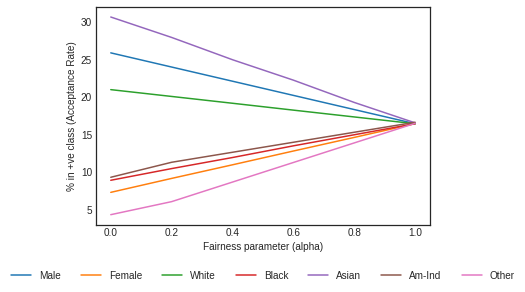

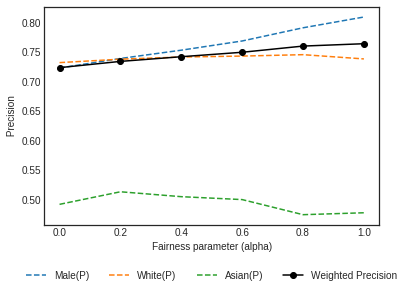

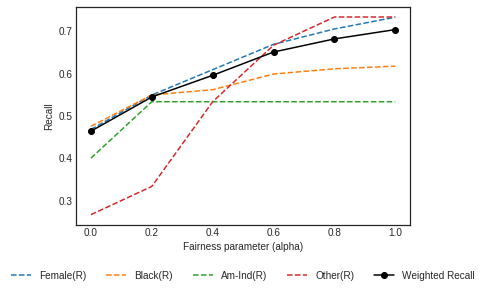

No handles with labels found to put in legend.


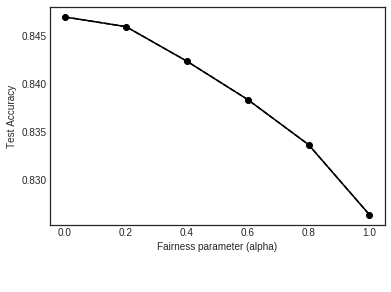

In [79]:
####--->>>  result at delta1=[.95], gama=[.07], epsilon=[.04]
import pulp as p 
import math
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
# delta1=[.8], gama=[.15], epsilon=[.01]
import matplotlib.pyplot as plt
import numpy as np
alpha=[0 ,.2 ,.4 ,.6, .8 ,1]
#marital
#U=80, M=24928, S=11568, D=4612
# m_3, m_0, m_1, m_2
#age
#>60 and <25= a_1
#>=25and <=60 =a_2
# print(data.head())
# print(data.shape[0],data.shape[1])
#acceptance_rate=np.transpose(acc_rate) 
a=[acc_rate[i][0]*100 for i in range(6)]  
b=[acc_rate[i][1]*100 for i in range(6)]  
c=[acc_rate[i][2]*100 for i in range(6)]  
d=[acc_rate[i][3]*100 for i in range(6)]   
e=[acc_rate[i][4]*100 for i in range(6)]  
f=[acc_rate[i][5]*100 for i in range(6)]   
g=[acc_rate[i][6]*100 for i in range(6)] 


  # 's_male', 's_female'  ,'r_white', 'r_black', 'r_asian-pac-islander','r_amer-indian-eskimo'
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(alpha,a,label='Male') 
ax.plot(alpha,b,label='Female')  
ax.plot(alpha,c,label='White') 
ax.plot(alpha,d,label='Black')
ax.plot(alpha,e,label='Asian') 
ax.plot(alpha,f,label='Am-Ind')
ax.plot(alpha,g,label='Other')

   
plt.title('')
ax.set_xlabel('Fairness parameter (alpha)')
ax.set_ylabel('% in +ve class (Acceptance Rate)') 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
plt.show() 




import os

fig.savefig('a1.png') 

#P R P R P R R 
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
np.set_printoptions(precision=4)  # For compact display.

a=[prec[i][0] for i in range(6)]  

c=[prec[i][2] for i in range(6)]  
 
e=[prec[i][4] for i in range(6)]  
x=[weight_prec[i] for i in range(6)] 

'''
y1=savgol_filter(a, 6, 2)
y2=savgol_filter(b, 6, 2)
y3=savgol_filter(c, 6, 2)
y4=savgol_filter(d, 6, 2)
y5=savgol_filter(e, 6, 2)
y6=savgol_filter(f, 6, 2)
y7=savgol_filter(g, 6, 2)
'''



fig = plt.figure()
ax = plt.subplot(111)

ax.plot(alpha,a,label='Male(P)',linestyle='--') 
 
ax.plot(alpha,c,label='White(P)',linestyle='--') 

ax.plot(alpha,e,label='Asian(P)',linestyle='--') 
ax.plot(alpha,x,label='Weighted Precision',color='black',marker='o',linestyle='-')


   
plt.title('')
ax.set_xlabel('Fairness parameter (alpha)')
ax.set_ylabel(' Precision ') 
# ax.set_ylabel('% in +ve class (Acceptance Rate)') 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
plt.show() 
fig.savefig('a2.png')




#P R P R P R R 
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
np.set_printoptions(precision=4)  # For compact display.


b=[rec[i][1] for i in range(6)]  
 
d=[rec[i][3] for i in range(6)]   
 
f=[rec[i][5] for i in range(6)]   
g=[rec[i][6] for i in range(6)] 
y=[weight_rec[i] for i in range(6)]  
'''
y1=savgol_filter(a, 6, 2)
y2=savgol_filter(b, 6, 2)
y3=savgol_filter(c, 6, 2)
y4=savgol_filter(d, 6, 2)
y5=savgol_filter(e, 6, 2)
y6=savgol_filter(f, 6, 2)
y7=savgol_filter(g, 6, 2)
'''



fig = plt.figure()
ax = plt.subplot(111)


ax.plot(alpha,b,label='Female(R)',linestyle='--')  
ax.plot(alpha,d,label='Black(R)',linestyle='--')
ax.plot(alpha,f,label='Am-Ind(R)',linestyle='--')
ax.plot(alpha,g,label='Other(R)',linestyle='--')
ax.plot(alpha,y,label='Weighted Recall',color='black',marker='o',linestyle='-')

   
plt.title('')
ax.set_xlabel('Fairness parameter (alpha)')
ax.set_ylabel('Recall') 
# ax.set_ylabel('% in +ve class (Acceptance Rate)') 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
plt.show() 
fig.savefig('a2.png') 

#P R P R P R R 
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
np.set_printoptions(precision=4)  # For compact display.

 
c=[accu[i] for i in range(6)]  


'''
y1=savgol_filter(a, 6, 2)
y2=savgol_filter(b, 6, 2)
y3=savgol_filter(c, 6, 2)
y4=savgol_filter(d, 6, 2)
y5=savgol_filter(e, 6, 2)
y6=savgol_filter(f, 6, 2)
y7=savgol_filter(g, 6, 2)
'''



fig = plt.figure()
ax = plt.subplot(111)

  
ax.plot(alpha,c,label='',color='black',marker='o',linestyle='-') 



   
plt.title('')
ax.set_xlabel('Fairness parameter (alpha)')
ax.set_ylabel('% Test Accuracy') 
# ax.set_ylabel('% in +ve class (Acceptance Rate)') 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
#plt.show() 
plt.xlabel('Fairness parameter (alpha)')
plt.ylabel('Test Accuracy')
plt.title('')
plt.plot(alpha, c,color='black', linestyle='dashed', marker='.',
     markerfacecolor='black', markersize=10)
plt.savefig('a5.png') 

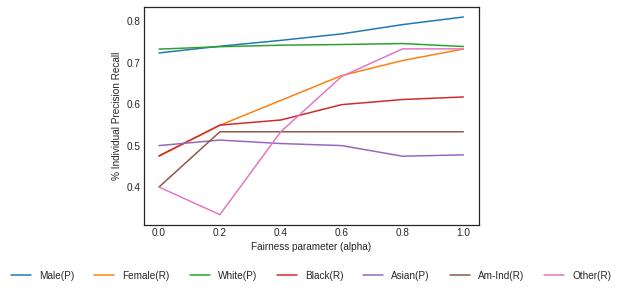

In [48]:
#P R P R P R R 
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
np.set_printoptions(precision=2)  # For compact display.

a=[prec[i][0] for i in range(6)]  
b=[rec[i][1] for i in range(6)]  
c=[prec[i][2] for i in range(6)]  
d=[rec[i][3] for i in range(6)]   
e=[prec[i][4] for i in range(6)]  
f=[rec[i][5] for i in range(6)]   
g=[rec[i][6] for i in range(6)] 

'''
y1=savgol_filter(a, 6, 2)
y2=savgol_filter(b, 6, 2)
y3=savgol_filter(c, 6, 2)
y4=savgol_filter(d, 6, 2)
y5=savgol_filter(e, 6, 2)
y6=savgol_filter(f, 6, 2)
y7=savgol_filter(g, 6, 2)
'''



fig = plt.figure()
ax = plt.subplot(111)

ax.plot(alpha,a,label='Male(P)') 
ax.plot(alpha,b,label='Female(R)')  
ax.plot(alpha,c,label='White(P)') 
ax.plot(alpha,d,label='Black(R)')
ax.plot(alpha,e,label='Asian(P)') 
ax.plot(alpha,f,label='Am-Ind(R)')
ax.plot(alpha,g,label='Other(R)')


   
plt.title('')
ax.set_xlabel('Fairness parameter (alpha)')
ax.set_ylabel('% Individual Precision Recall') 
# ax.set_ylabel('% in +ve class (Acceptance Rate)') 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
plt.show() 
fig.savefig('a2.png') 

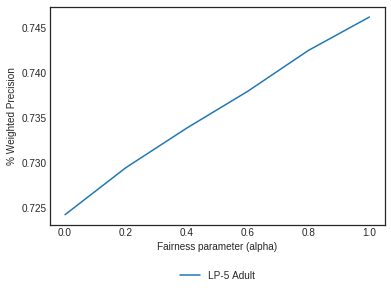

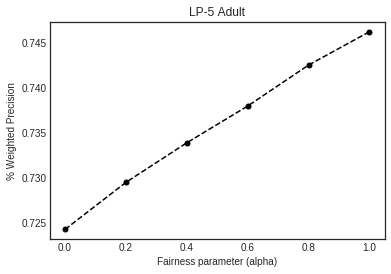

In [49]:
#P R P R P R R 
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
np.set_printoptions(precision=2)  # For compact display.

a=[weight_prec[i] for i in range(6)]  



'''
y1=savgol_filter(a, 6, 2)
y2=savgol_filter(b, 6, 2)
y3=savgol_filter(c, 6, 2)
y4=savgol_filter(d, 6, 2)
y5=savgol_filter(e, 6, 2)
y6=savgol_filter(f, 6, 2)
y7=savgol_filter(g, 6, 2)
'''



fig = plt.figure()
ax = plt.subplot(111)

ax.plot(alpha,a,label='LP-5 Adult') 



   
plt.title('')
ax.set_xlabel('Fairness parameter (alpha)')
ax.set_ylabel('% Weighted Precision') 
# ax.set_ylabel('% in +ve class (Acceptance Rate)') 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
plt.show() 



plt.xlabel('Fairness parameter (alpha)')
plt.ylabel('% Weighted Precision')
plt.title('LP-5 Adult')
plt.plot(alpha, a,color='black', linestyle='dashed', marker='.',
     markerfacecolor='black', markersize=10)
plt.savefig('a3.png') 

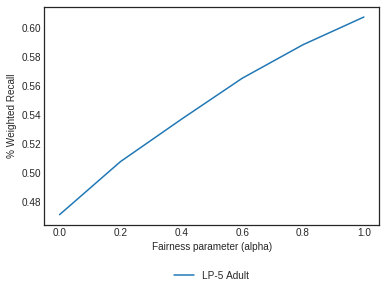

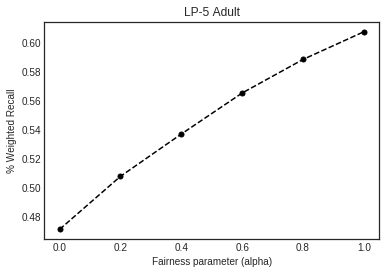

In [50]:
#P R P R P R R 
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
np.set_printoptions(precision=2)  # For compact display.

 
b=[weight_rec[i] for i in range(6)]  



'''
y1=savgol_filter(a, 6, 2)
y2=savgol_filter(b, 6, 2)
y3=savgol_filter(c, 6, 2)
y4=savgol_filter(d, 6, 2)
y5=savgol_filter(e, 6, 2)
y6=savgol_filter(f, 6, 2)
y7=savgol_filter(g, 6, 2)
'''



fig = plt.figure()
ax = plt.subplot(111)

ax.plot(alpha,b,label='LP-5 Adult')  




   
plt.title('')
ax.set_xlabel('Fairness parameter (alpha)')
ax.set_ylabel('% Weighted Recall') 
# ax.set_ylabel('% in +ve class (Acceptance Rate)') 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
plt.show() 
plt.xlabel('Fairness parameter (alpha)')
plt.ylabel('% Weighted Recall')
plt.title('LP-5 Adult')
plt.plot(alpha, b,color='black', linestyle='dashed', marker='.',
     markerfacecolor='black', markersize=10)
plt.savefig('a4.png') 

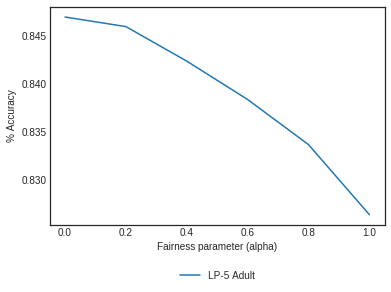

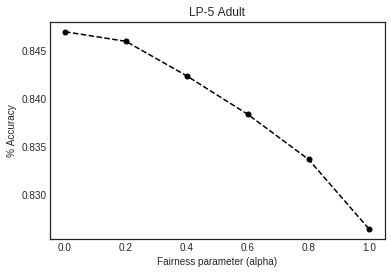

In [51]:
#P R P R P R R 
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
np.set_printoptions(precision=2)  # For compact display.

 
c=[accu[i] for i in range(6)]  


'''
y1=savgol_filter(a, 6, 2)
y2=savgol_filter(b, 6, 2)
y3=savgol_filter(c, 6, 2)
y4=savgol_filter(d, 6, 2)
y5=savgol_filter(e, 6, 2)
y6=savgol_filter(f, 6, 2)
y7=savgol_filter(g, 6, 2)
'''



fig = plt.figure()
ax = plt.subplot(111)

  
ax.plot(alpha,c,label='LP-5 Adult') 



   
plt.title('')
ax.set_xlabel('Fairness parameter (alpha)')
ax.set_ylabel('% Accuracy') 
# ax.set_ylabel('% in +ve class (Acceptance Rate)') 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
plt.show() 
plt.xlabel('Fairness parameter (alpha)')
plt.ylabel('% Accuracy')
plt.title('LP-5 Adult')
plt.plot(alpha, c,color='black', linestyle='dashed', marker='.',
     markerfacecolor='black', markersize=10)
plt.savefig('a5.png') 

In [29]:





#basic  weighting 2


# bilal - am_ind asian black other white female male(actual precision sequence)
# 6         5          4          2                1              0                  3

# ours -s_male, s_female  r_white, r_black, r_asian-pac-islander','r_amer-indian-eskimo','r_other
           
# beta=[6         5          4          2                1              0                  3]

# beta=[beta[6], beta[5],beta[4],beta[2],beta[1],beta[0],beta[3]]


#bilal -female male  am_ind asian  black other white (actual acceptance rate sequence)
#          0      1     2       3     4      5    6   
# ours -s_male, s_female  r_white, r_black, r_asian-pac-islander','r_amer-indian-eskimo', 'r_other
           
# beta=[1       0        6          4            3                   2                    5]

'''
#NG
import time
import pulp as p 
def min_max_lp_all_ng5(data1,beta,eps,e,alpha,alpha2):
    import pulp as p 
    import math
    
    #beta=[beta1[1]/100, beta1[0]/100,beta1[6]/100,beta1[4]/100,beta1[3]/100,beta1[2]/100,beta1[5]/100]
    #print(beta)
    m=data1.shape[0]
    n=data1.shape[1]
    print('dimension of data')
    print(m,n)
    
    ################ sorted result
    a1=0
    a2=0
    b1=0
    b2=0
    c1=0
    c2=0
    d1=0
    d2=0
    e1=0
    e2=0
    h1=[]
    h2=[]
    h3=[]
    h4=[]
    h5=[]
    h6=[]
    h7=[]
    key1=[]
    key2=[]
    key3=[]
    key4=[]
    key5=[]
    key6=[]
    key7=[]
    cost=np.zeros(n,dtype=int)
    data2=np.zeros((m,n),dtype=int)
    for i in range(n):
        if data1[0][i]==1:            

            h1.append(e[i][1])
            key1.append(i)
            if data1[2][i]==1:
                a1=a1+1
            elif data1[3][i]==1:
                b1=b1+1
            elif data1[4][i]==1:
                c1=c1+1 
            elif data1[5][i]==1:
                d1=d1+1
            elif data1[6][i]==1:
                e1=e1+1

        elif data1[1][i]==1:
            h2.append(e[i][1])
            key2.append(i)
            if data1[2][i]==1:
                a2=a2+1
            elif data1[3][i]==1:
                b2=b2+1
            elif data1[4][i]==1:
                c2=c2+1 
            elif data1[5][i]==1:
                d2=d2+1
            elif data1[6][i]==1:
                e2=e2+1
            
        if data1[2][i]==1:
            h3.append(e[i][1])
            key3.append(i)
            
        elif data1[3][i]==1:
            h4.append(e[i][1])
            key4.append(i)
        elif data1[4][i]==1:
            h5.append(e[i][1])
            key5.append(i)
        elif data1[5][i]==1:
            h6.append(e[i][1])
            key6.append(i)
        elif data1[6][i]==1:
            h7.append(e[i][1])
            key7.append(i)
#print(hc)
#     print(key1)
    
    for i in range(1,len(h1)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h1[j-1]<h1[j]:
                index=j
                var=h1[j]
                h1[j]=h1[j-1]
                h1[j-1]=var

                var2=key1[j]
                key1[j]=key1[j-1]
                key1[j-1]=var2
            else:
                break
    

    for i in range(1,len(h2)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h2[j-1]<h2[j]:
                index=j
                var=h2[j]
                h2[j]=h2[j-1]
                h2[j-1]=var

                var2=key2[j]
                key2[j]=key2[j-1]
                key2[j-1]=var2
            else:
                break
    for i in range(1,len(h3)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h3[j-1]<h3[j]:
                index=j
                var=h3[j]
                h3[j]=h3[j-1]
                h3[j-1]=var

                var2=key3[j]
                key3[j]=key3[j-1]
                key3[j-1]=var2
            else:
                break
    for i in range(1,len(h4)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h4[j-1]<h4[j]:
                index=j
                var=h4[j]
                h4[j]=h4[j-1]
                h4[j-1]=var

                var2=key4[j]
                key4[j]=key4[j-1]
                key4[j-1]=var2
            else:
                break
    for i in range(1,len(h5)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h3[j-1]<h5[j]:
                index=j
                var=h5[j]
                h5[j]=h5[j-1]
                h5[j-1]=var

                var2=key5[j]
                key5[j]=key5[j-1]
                key5[j-1]=var2
            else:
                break
                
                
                
    for i in range(1,len(h6)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h6[j-1]<h6[j]:
                index=j
                var=h6[j]
                h6[j]=h6[j-1]
                h6[j-1]=var

                var2=key6[j]
                key6[j]=key6[j-1]
                key6[j-1]=var2
            else:
                break        
                

    for i in range(1,len(h7)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h7[j-1]<h7[j]:
                index=j
                var=h7[j]
                h7[j]=h7[j-1]
                h7[j-1]=var

                var2=key7[j]
                key7[j]=key7[j-1]
                key7[j-1]=var2
            else:
                break 
             
    
   
    
  ###############################1#################################  
    for j in range(len(key1)):    
        #data2[0][key1[j]]=((j+1)/((beta[0]*len(key1))*((beta[0]*len(key1))+1)/2)*alpha[0])
         
        data2[0][key1[j]]=(j+1)*alpha2[0]
    for j in range(len(key2)):
        data2[1][key2[j]]=(j+1)*alpha2[1]
    for j in range(len(key3)):
        if data1[2][key3[j]]==1 and data1[0][key3[j]]==1: 
            data2[2][key3[j]]=(j+1)*(len(key1)/len(key3))*alpha2[2]
        else:
            data2[2][key3[j]]=(j+1)*(len(key2)/len(key3))*alpha2[2]                  
        
    for j in range(len(key4)):
        if data1[3][key4[j]]==1 and data1[0][key4[j]]==1:                   
            data2[3][key4[j]]=(j+1)*(len(key1)/len(key4))*alpha2[3]
        else :                     
            data2[3][key4[j]]=(j+1)*(len(key2)/len(key4))*alpha2[3]
                             
    for j in range(len(key5)):
        if data1[4][key5[j]]==1 and data1[0][key5[j]]==1:                  
            data2[4][key5[j]]=(j+1)*(len(key1)/len(key5))*alpha2[4]
        else:      
            data2[4][key5[j]]=(j+1)*(len(key2)/len(key5))*alpha2[4]
    for j in range(len(key6)):
        if data1[5][key6[j]]==1 and data1[0][key6[j]]==1:                    
            data2[5][key6[j]]=(j+1)*(len(key1)/len(key6))*alpha2[5]
        else:                    
             data2[5][key6[j]]=(j+1)*(len(key2)/len(key6))*alpha2[5]               
    for j in range(len(key7)):
        if data1[6][key7[j]]==1 and data1[0][key7[j]]==1:
            data2[6][key7[j]]=(j+1)*(len(key1))/len(key7)*alpha2[6]
        else:
             data2[6][key7[j]]=(j+1)*(len(key2)/len(key7))*alpha2[6]
    #######################################################################    
    
       
    ####################################################################### 
   

    for j in range(n):
        summ=0
        for i in range(m):
       
            summ=summ+data2[i][j] 
        cost[j]=summ
        
        
    ################
    
    
    Lp_prob = p.LpProblem('Problem', p.LpMinimize)  
   
    
#     X=np.zeros(n+1,dtype=p.LpVariable)
    X=np.zeros(n+m+1,dtype=p.LpVariable)
    sizes=np.zeros(m,dtype=int)
#     report_index(index,data1,e):  
    max_size=0
    for i in range(m):
        count=0
        for j in range(n):
            if data1[i][j]==1:
                count=count+1 
        if count>max_size:
            max_size=count
        sizes[i]=count
    print(sizes)    
    #############################33
    
    
    
    
    ###############################
        
        
        
  
    select_sizes=np.zeros(m,dtype=int)
   
    size_final=np.zeros(m,dtype=int)

    
    for i in range(n):
        var1=str(i)       
        X[i]=p.LpVariable(var1,lowBound=0,upBound=1,cat='Integer')
   
    X[n]=p.LpVariable(str(n),lowBound=0,upBound=1,cat='Continuous')  
#     for i in range(m):
#         k=n+i+1
#         var1=str(k)     
#         alpha=(((sizes[i])*(sizes[i]+1))/2)
#         X[i]=p.LpVariable(var1,lowBound=(((beta*sizes[i])*(beta*sizes[i]+1))/2),upBound=alpha,cat='Continuous')
    
        
#     X[n]=  p.LpVariable("z1",lowBound=0)
    #X[n+1]=  p.LpVariable("z2",lowBound=0)
  

    #########objective function#####################
    
#     Lp_prob += 2*X[n+1]+10*X[n+2]+9*X[n+3]+3*X[n+4]
    
    Lp_prob+= p.lpSum([(X[j])*cost[j] for j in range(n)]) 
    #Lp_prob+=1  
    

    ##############constraint#################
    for i in range(2*m):
        if i<m:

            Lp_prob += p.lpSum([(X[j])*(data1[i][j]) for j in range(n)]) >= math.floor(beta[i]*sizes[i])
            Lp_prob += p.lpSum([(X[j])*(data1[i][j]) for j in range(n)]) <= math.ceil((beta[i]+eps)*sizes[i])
           # Lp_prob += p.lpSum([(X[j])*(data1[i][j])*(sizes[i]-report_index(j,i,data1,e)+1) for j in range(n)]) <= X[n+i+1]
                    
#Lp_prob += p.lpSum([(X[j])*(data1[i][j])*(sizes[i]-report_index(j,i,data1,e)+1)/1000 for j in range(n)]) >= X[n+i+1]
    
            
#         else:        
#             Lp_prob += X[n] >= p.lpSum([-1*2*(X[j]-0.5)*data1[i-m][j] for j in range(n)])   /((sizes[i])*(sizes[i]+1)/2)
            #Lp_prob += X[n+1] >= p.lpSum([-1*2*(X[j]-0.5)+r[j] for j in range(n)]) 
#     Lp_prob += X[n+1] >= p.lpSum([2*(X[j]-0.5)-r[j] for j in range(n)])
#     Lp_prob += X[n+1] >= p.lpSum([-1*2*(X[j]-0.5)+r[j] for j in range(n)])       
         
#     Lp_prob += p.lpSum([2*(X[i]-0.5)*r[i] for i in range(n)]) >= X[n]*n
    
#     Lp_prob += p.lpSum([2*(X[i]-0.5)*r[i]*(1/pow(2,l1.index(i))) for i in l1]) >= 2*(1-(1/pow(2,math.floor(beta*size_final[0]))))
#     Lp_prob += p.lpSum([2*(X[i]-0.5)*r[i]*(1/pow(2,l2.index(i))) for i in l2]) >= 2*(1-(1/pow(2,math.floor(beta*size_final[1]))))
#     Lp_prob += p.lpSum([2*(X[i]-0.5)*r[i]*(1/pow(2,l3.index(i))) for i in l3]) >= 2*(1-(1/pow(2,math.floor(beta*size_final[2]))))
#     Lp_prob += p.lpSum([2*(X[i]-0.5)*r[i]*(1/pow(2,l4.index(i))) for i in l4]) >= 2*(1-(1/pow(2,math.floor(beta*size_final[3]))))
    
    #n is the number of elements in sensitive attribute 
                 
#     Lp_prob += X[n] <= 42000
    Lp_prob+= p.lpSum([(X[j])*cost[j] for j in range(n)])>=100
        
    #####################################
    status = Lp_prob.solve()   # Solver 
    print(p.LpStatus[status]) 
    print("objective is:")        
    print(p.value(Lp_prob.objective))
    print("discripency is:") 
    print(p.value(X[n]))
    x=np.zeros(n,dtype=float)

   # The solution status 
    Synth1={}
    Synth2={}
    # # Printing the final solution 
    for i in range(n):
        if(p.value(X[i])==1):
            Synth1[i]=1 
            Synth2[i]=-1
#             if(data1[2][i]==1):
#                 print("no")
        else:
            Synth1[i]=-1
            Synth2[i]=1
    Synthu1=Synth1  
    Synthu2=Synth2  
    
              
    return Synthu1,Synthu2   
'''

In [30]:
'''
accu_all,DP_all,acceptance_rate,alpha_weight = main(sensitive, Y_test, Y_test_pred,e)
'''

In [ ]:
####--->>>  result at delta1=[.95], gama=[.07], epsilon=[.04]
import pulp as p 
import math
import pandas as pd
import matplotlib.pyplot as plt

# delta1=[.8], gama=[.15], epsilon=[.01]
import matplotlib.pyplot as plt
import numpy as np

#marital
#U=80, M=24928, S=11568, D=4612
# m_3, m_0, m_1, m_2
#age
#>60 and <25= a_1
#>=25and <=60 =a_2
# print(data.head())
# print(data.shape[0],data.shape[1])
 
a=[acceptance_rate[0][i]*100 for i in range(21)]  
b=[acceptance_rate[1][i]*100 for i in range(21)]  
c=[acceptance_rate[2][i]*100 for i in range(21)]  
d=[acceptance_rate[3][i]*100 for i in range(21)]   
e=[acceptance_rate[4][i]*100 for i in range(21)]  
f=[acceptance_rate[5][i]*100 for i in range(21)]   
g=[acceptance_rate[6][i]*100 for i in range(21)] 


  # 's_male', 's_female'  ,'r_white', 'r_black', 'r_asian-pac-islander','r_amer-indian-eskimo'
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(alpha_weight,a,label='Male') 
ax.plot(alpha_weight,b,label='Female')  
ax.plot(alpha_weight,c,label='White') 
ax.plot(alpha_weight,d,label='Black')
ax.plot(alpha_weight,e,label='Asian') 
ax.plot(alpha_weight,f,label='Am-Ind')
ax.plot(alpha_weight,g,label='Other')

   
plt.title('')
ax.set_xlabel('Fairness parameter (alpha)')
ax.set_ylabel('% in +ve class (Acceptance Rate)') 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
plt.show() 


plt.show() 

In [ ]:

# delta1=[.8], gama=[.15], epsilon=[.01]
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
np.set_printoptions(precision=2)  # For compact display.
# x = np.array([2, 2, 5, 2, 1, 0, 1, 8, 15,13,7,2,0,9,15,6])
y1=savgol_filter(a, 21, 2)
y2=savgol_filter(b, 21, 2)
y3=savgol_filter(c, 21, 2)
y4=savgol_filter(d, 21, 2)
y5=savgol_filter(e, 21, 2)
y6=savgol_filter(f, 21, 2)
y7=savgol_filter(g, 21, 2)




fig = plt.figure()
ax = plt.subplot(111)

ax.plot(alpha_weight,y1,label='Male') 
ax.plot(alpha_weight,y2,label='Female')  
ax.plot(alpha_weight,y3,label='White') 
ax.plot(alpha_weight,y4,label='Black')
ax.plot(alpha_weight,y5,label='Asian') 
ax.plot(alpha_weight,y6,label='Am-Ind')
ax.plot(alpha_weight,y7,label='Other')


   
plt.title('')
ax.set_xlabel('Fairness parameter (alpha)')
ax.set_ylabel('% in +ve class (Acceptance Rate)') 
# ax.set_ylabel('% in +ve class (Acceptance Rate)') 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
plt.show() 


In [ ]:

# # delta1=[.8], gama=[.15], epsilon=[.01]
# import matplotlib.pyplot as plt
# import numpy as np
# #alpha_weight parameter
# plt.axis([0, 1, 0.79, 0.86])
# plt.xlabel('Fairness parameter (alpha)')
# plt.ylabel('Test Accuracy')
# t=[float(accu_all[i]/100) for i in range(21)] 
# print(t)
# plt.title('')
 
# plt.plot(alpha_weight, t,color='black', linestyle='dashed', marker='.',
#      markerfacecolor='black', markersize=10)   

# plt.show() 

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# #alpha_weight parameter
# plt.axis([0, 1, 0.79, .86])
# plt.xlabel('Fairness parameter (alpha)')
# plt.ylabel('Test Accuracy')
# t=[.85,.844,.832,.822,.8127,.80]
# print(t)
# plt.title('')
# alpha_w=[.0,.1,.4,.6,.8,1]
# plt.plot(alpha_w, t,color='black', linestyle='dashed', marker='.',markerfacecolor='black', markersize=10)   

# plt.show() 



In [ ]:
# ####--->>>  result at delta1=[.95], gama=[.07], epsilon=[.04]
# import pulp as p 
# import math
# import pandas as pd
# import matplotlib.pyplot as plt

# # delta1=[.8], gama=[.15], epsilon=[.01]
# import matplotlib.pyplot as plt
# import numpy as np

# #marital
# #U=80, M=24928, S=11568, D=4612
# # m_3, m_0, m_1, m_2
# #age
# #>60 and <25= a_1
# #>=25and <=60 =a_2
# # print(data.head())
# # print(data.shape[0],data.shape[1])
 
# a=[acceptance_rate[0][i]*100 for i in range(21)]  
# b=[acceptance_rate[1][i]*100 for i in range(21)]  
# c=[acceptance_rate[2][i]*100 for i in range(21)]  
# d=[acceptance_rate[3][i]*100 for i in range(21)]   
# e=[acceptance_rate[4][i]*100 for i in range(21)]  
# f=[acceptance_rate[5][i]*100 for i in range(21)]   
# g=[acceptance_rate[6][i]*100 for i in range(21)] 


#   # 's_male', 's_female'  ,'r_white', 'r_black', 'r_asian-pac-islander','r_amer-indian-eskimo'
# fig = plt.figure()
# ax = plt.subplot(111)
# ax.plot(alpha_weight,a,label='Male') 
# ax.plot(alpha_weight,b,label='Female')  
# ax.plot(alpha_weight,c,label='White') 
# ax.plot(alpha_weight,d,label='Black')
# ax.plot(alpha_weight,e,label='Asian') 
# ax.plot(alpha_weight,f,label='Am-Ind')
# ax.plot(alpha_weight,g,label='Other')

   
# plt.title('')
# ax.set_xlabel('Fairness parameter (alpha)')
# ax.set_ylabel('% in +ve class (Acceptance Rate)') 

# ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
# plt.show() 


# plt.show() 

In [ ]:

# # delta1=[.8], gama=[.15], epsilon=[.01]
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.signal import savgol_filter
# np.set_printoptions(precision=2)  # For compact display.
# # x = np.array([2, 2, 5, 2, 1, 0, 1, 8, 15,13,7,2,0,9,15,6])
# y1=savgol_filter(a, 21, 2)
# y2=savgol_filter(b, 21, 2)
# y3=savgol_filter(c, 21, 2)
# y4=savgol_filter(d, 21, 2)
# y5=savgol_filter(e, 21, 2)
# y6=savgol_filter(f, 21, 2)
# y7=savgol_filter(g, 21, 2)




# fig = plt.figure()
# ax = plt.subplot(111)

# ax.plot(alpha_weight,y1,label='Male') 
# ax.plot(alpha_weight,y2,label='Female')  
# ax.plot(alpha_weight,y3,label='White') 
# ax.plot(alpha_weight,y4,label='Black')
# ax.plot(alpha_weight,y5,label='Asian') 
# ax.plot(alpha_weight,y6,label='Am-Ind')
# ax.plot(alpha_weight,y7,label='Other')


   
# plt.title('')
# ax.set_xlabel('Fairness parameter (alpha)')
# ax.set_ylabel('% in +ve class (Acceptance Rate)') 
# # ax.set_ylabel('% in +ve class (Acceptance Rate)') 

# ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
# plt.show() 


In [ ]:
# # delta1=[.8], gama=[.1], epsilon=[.05]  

# import matplotlib.pyplot as plt
# import numpy as np
# #alpha_weight parameter
# plt.axis([0, 1, 0.79, 0.86])
# plt.xlabel('Fairness parameter (alpha)')
# plt.ylabel('Test Accuracy')
# t=[float(accu_all[i]/100) for i in range(21)] 
# print(t)
# plt.title('')
 
# plt.plot(alpha_weight, t,color='black', linestyle='dashed', marker='.',
#      markerfacecolor='black', markersize=10)   

# plt.show() 

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# #alpha_weight parameter
# plt.axis([0, 1, 0.79, .86])
# plt.xlabel('Fairness parameter (alpha)')
# plt.ylabel('Test Accuracy')
# t=[.851,.8432,.8321,.8146,.805,.7991]
# print(t)
# plt.title('')
# alpha_w=[.0,.2,.4,.7,.85,1]
# plt.plot(alpha_w, t,color='black', linestyle='dashed', marker='.',markerfacecolor='black', markersize=10)   

# plt.show() 



In [46]:
import array
s = "ab,cd,e"
a = [p.strip() for p in s]
print(a)

['a', 'b', ',', 'c', 'd', ',', 'e']


In [49]:
bank='bank2.csv'
for f in [bank]:
        dat = [s.strip().split(',') for s in open(f, 'r').readlines()]

In [50]:
print(dat)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

